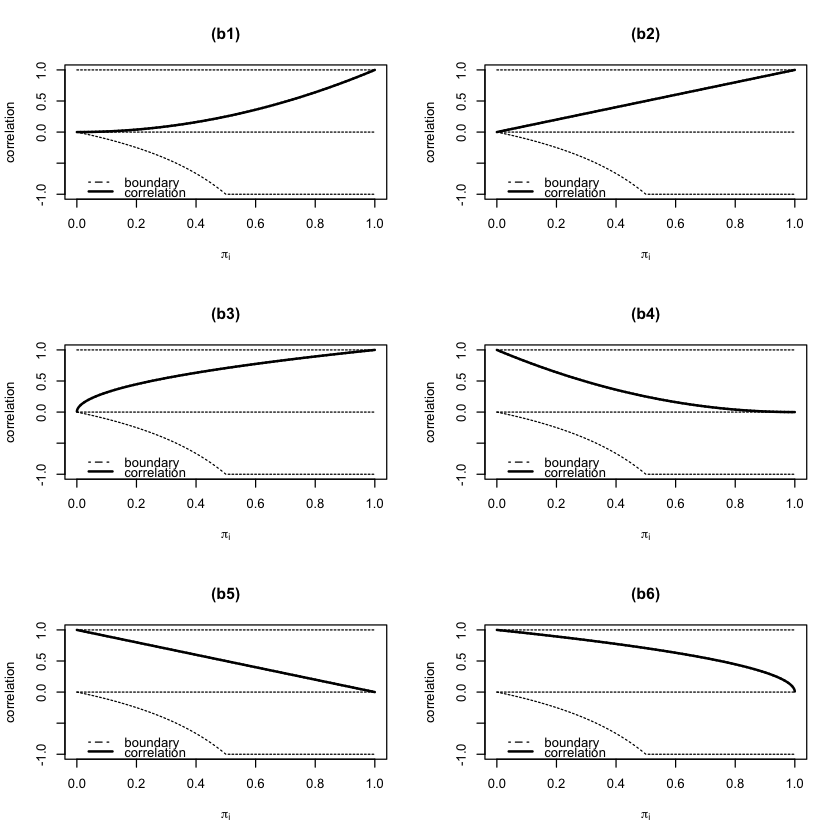

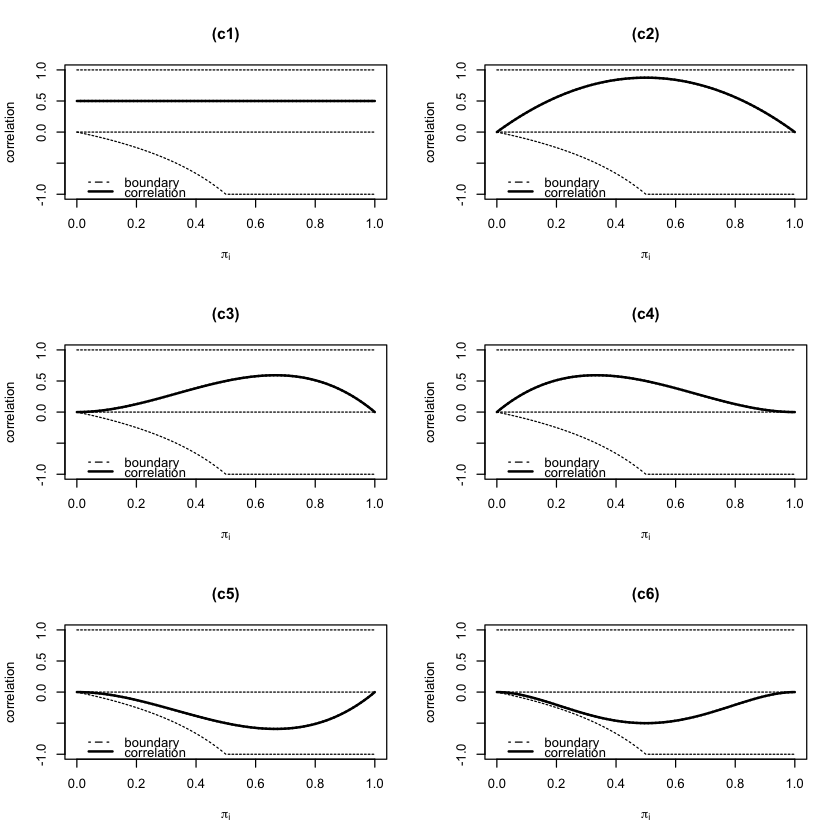

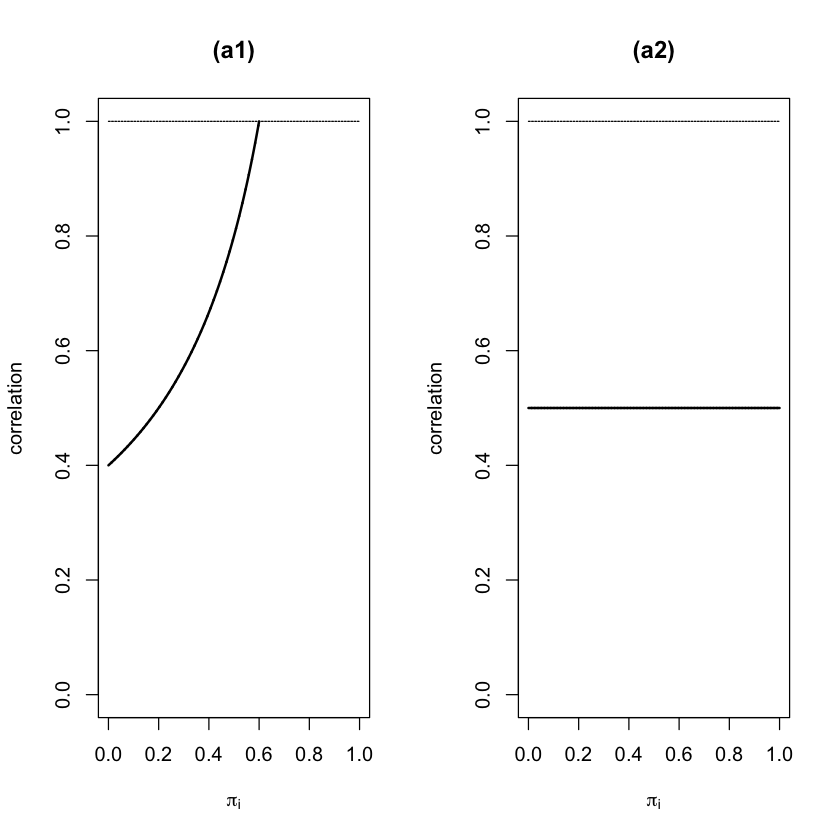

In [1]:
## plots of distribution

library(ggplot2)
library(grid)
# library(sgd)

fun_max = function(y){
  n = length(y)
  for(i in c(1:n)){ y[i] = max(y[i],-1);y[i] = min(y[i],1)}
  y
}

data_gen_fun = function(a,b,c,ty){
  epslon = 0.0001
  x = seq(epslon,1-epslon,epslon)
  y = -x/(1-x)
  y_corr_lower = fun_max(y)  ## lower bound of correlation
  y_corr_upper = rep(1,length(x))
  y_zero = rep(0,length(x))
  if(ty == 1){
    K = a/x+b/(1-x)
    y1 = K*x
    y1_renew = fun_max(y1)
  }else{
    K = c*x^(a-1)*(1-x)^(b-1)
    y1 = K*x
    y1_renew = fun_max(y1)
  }
  data_gen = data.frame(x,y_corr_lower,y_corr_upper,y_zero,y1,y1_renew)
}

plot_corr = function(data_gen){
  colors <- c("lower bound" = "blue", "upper bound" = "blue", "xaxis" = "grey","original rho" = "orange", "adjusted rho" = "red")
  
  ggplot(data_gen, aes(x = x)) + geom_line(aes(y = y_corr_lower, color = "lower bound")) + 
    geom_line(aes(y = y_corr_upper, color = "upper bound")) +
    geom_line(aes(y = y_zero, color = "xaxis")) + 
    geom_line(aes(y = y1, color = "original rho")) + 
    geom_line(aes(y = y1_renew, color = "adjusted rho")) + 
    labs(x = "pi", y = "corr", color = "Legend") + 
    scale_color_manual(values = colors) + 
    coord_cartesian(xlim =c(0, 1), ylim = c(-1, 1))+ 
    theme_bw()+theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),legend.position = c(0.1, 0.2))
}


plot_corr = function(data_gen,main_name){
  plot(data_gen[,1],data_gen[,2],xlim = c(0,1),ylim = c(-1,1),lty=4,lwd=1,  ## dotdash
       type = 'l',xlab = expression(pi['i']),ylab = 'correlation',main = main_name)
  lines(data_gen[,1],data_gen[,4],xlim = c(0,1),ylim = c(-1,1),lty=3,lwd=1,   ## dotted
        type = 'l')
  lines(data_gen[,1],data_gen[,3],xlim = c(0,1),ylim = c(-1,1),lty=4,lwd=1,   ## dotdash
        type = 'l')
  lines(data_gen[,1],data_gen[,6],xlim = c(0,1),ylim = c(-1,1),lty=1,lwd=2,    ## solid
        type = 'l')
  # legend("bottomleft", inset=.05, "correlation",bty='n', lty =1,lwd=2)
  # legend("bottomleft", inset=.05, "boundary",bty='n', lty =4,lwd=1)
  
  legend(c(0,0),c(-0.7,-0.7), inset=.05, "correlation",bty='n', lty =1,lwd=2)
  legend(c(0,0),c(-0.55,-0.55), inset=.05, "boundary",bty='n', lty =4,lwd=1)
  
}

###############  A
par(mfrow=c(3,2),omi=c(0,0,0,0))
alpha = 2; beta = 1; c = 1; ty = 0;
data_gen = data_gen_fun(alpha,beta,c,ty)
plot_corr(data_gen,"(b1)")

alpha = 1; beta = 1; c = 1; ty = 0;
data_gen = data_gen_fun(alpha,beta,c,ty)
plot_corr(data_gen,"(b2)")

alpha = 0.5; beta = 1; c = 1; ty = 0;
data_gen = data_gen_fun(alpha,beta,c,ty)
plot_corr(data_gen,"(b3)")

alpha = 0; beta = 3; c = 1; ty = 0;
data_gen = data_gen_fun(alpha,beta,c,ty)
plot_corr(data_gen,"(b4)")

alpha = 0; beta = 2; c = 1; ty = 0;
data_gen = data_gen_fun(alpha,beta,c,ty)
plot_corr(data_gen,"(b5)")

alpha = 0; beta = 1.5; c = 1; ty = 0;
data_gen = data_gen_fun(alpha,beta,c,ty)
plot_corr(data_gen,"(b6)")

###########################  B
alpha = 0; beta = 1; c = 0.5; ty = 0;
data_gen = data_gen_fun(alpha,beta,c,ty)
plot_corr(data_gen,"(c1)")

alpha = 1; beta = 2; c = 3.5; ty = 0;
data_gen = data_gen_fun(alpha,beta,c,ty)
plot_corr(data_gen,"(c2)")

alpha = 2; beta = 2; c = 4; ty = 0;
data_gen = data_gen_fun(alpha,beta,c,ty)
plot_corr(data_gen,"(c3)")

alpha = 1; beta = 3; c = 4; ty = 0;
data_gen = data_gen_fun(alpha,beta,c,ty)
plot_corr(data_gen,"(c4)")

alpha = 2; beta = 2; c = -4; ty = 0;
data_gen = data_gen_fun(alpha,beta,c,ty)
plot_corr(data_gen,"(c5)")

alpha = 2; beta = 3; c = -8; ty = 0;
data_gen = data_gen_fun(alpha,beta,c,ty)
plot_corr(data_gen,"(c6)")




######################################################

fun_max = function(y){
  n = length(y)
  for(i in c(1:n)){ y[i] = max(y[i],-1);}
  y
}

data_gen_fun = function(a,b,c,ty){
  epslon = 0.0001
  x = seq(epslon,1-epslon,epslon)
  y = -x/(1-x)
  y_corr_lower = fun_max(y)  ## lower bound of correlation
  y_corr_upper = rep(1,length(x))
  y_zero = rep(0,length(x))
  if(ty == 1){
    K = a/x+b/(1-x)
    y1 = K*x
    y1_renew = fun_max(y1)
  }else{
    K = c*x^(a-1)*(1-x)^(b-1)
    y1 = K*x
    y1_renew = fun_max(y1)
  }
  data_gen = data.frame(x,y_corr_lower,y_corr_upper,y_zero,y1,y1_renew)
}

plot_corr_two = function(data_gen,main_name,y_max){
  ylimit = c(1:dim(data_gen)[1])[data_gen[,6]<=1]
  plot(data_gen[,1],data_gen[,3],xlim = c(0,1),ylim = c(0,1),lty=4,lwd=1,  ## dotdash
       type = 'l',xlab = expression(pi['i']),ylab = 'correlation',main = main_name)
  lines(data_gen[ylimit,1],data_gen[ylimit,6],xlim = c(0,1),ylim = c(0,1),lty=1,lwd=2,    ## solid
        type = 'l')
  
  legend(c(0,0),c(1.9,1.9), inset=.05, "correlation",bty='n', lty =1,lwd=2)
  legend(c(0,0),c(1.75,1.75), inset=.05, "boundary",bty='n', lty =4,lwd=1)
  
}
###############beta = 1
par(mfrow=c(1,2),omi=c(0,0,0,0))

alpha = 0; beta = 0; c = 0.4; ty = 0;
data_gen = data_gen_fun(alpha,beta,c,ty)
plot_corr_two(data_gen,"(a1)",2)

alpha = 0; beta = 1; c = 0.5; ty = 0;
data_gen = data_gen_fun(alpha,beta,c,ty)
plot_corr_two(data_gen,"(a2)",1)





Time difference of 8.590933 secs
Time difference of 8.63766 secs
Time difference of 0.1052759 secs
Time difference of 0.1056809 secs
Time difference of 0.0008399487 secs
Time difference of 0.001202106 secs
Time difference of 0.00007820129 secs
Time difference of 0.0003838539 secs


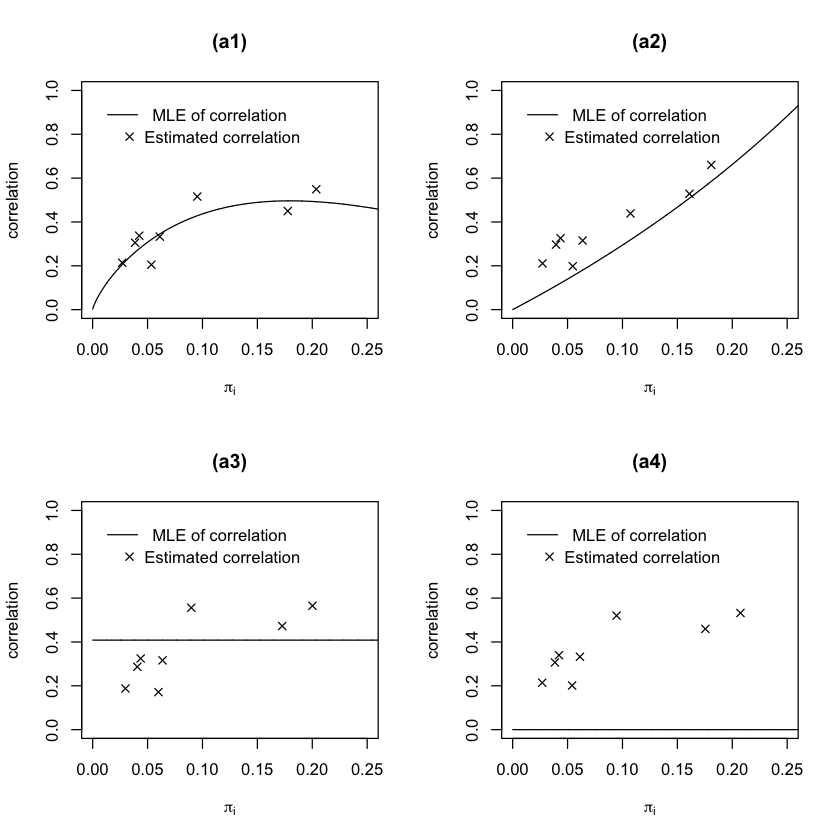

In [4]:
## estimation for positive correlation

library(lubridate)
library(ggplot2)
library(grid)
likelihood_fun.mm = function(x.pi,al,be,ga,a1,a2,a3){
  a1.min = min(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1))
  a2.min = min(2*(1-ga*x.pi^al*(1-x.pi)^(be)))
  a3.min = min(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1))
  if(min(a1.min,a2.min,a3.min)<0){
    y = NULL
  }else{
    y = sum((2*a1+a2)*log(1-x.pi)+(a2+2*a3)*log(x.pi)+a1*log(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1)) +
              a2*log(2*(1-ga*x.pi^al*(1-x.pi)^(be))) + a3*log(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1)))
  }
}
drba_fun_n = function(n1,n2,n3,r,a,b,x){
  dy1 = n1*(x^(a+1)*(1-x)^(b-1))/(1+r*x^(a+1)*(1-x)^(b-1))
  dy2 = n2*(-x^(a)*(1-x)^(b))/(1-r*x^a*(1-x)^(b))
  dy3 = n3*(x^(a-1)*(1-x)^(b+1))/(1+r*x^(a-1)*(1-x)^(b+1))
  dr =  sum(dy1 + dy2 + dy3)
  dbe =  sum(r*(dy1 + dy2 + dy3)*log(1-x)) + 0.00001/(b)
  dal =  sum(r*(dy1 + dy2 + dy3)*log(x)) + 0.00001/a
  c(dal,dbe,dr)
}
dpi_fun = function(n1,n2,n3,r,a,b,x){
  dy1 = n1*r*((a+1)*x^a*(1-x)^(b-1) - (b-1)*x^(a+1)*(1-x)^(b-2))/(1+r*x^(a+1)*(1-x)^(b-1))
  dy2 = n2*r*(-a*x^(a-1)*(1-x)^(b)+ (b)*x^a*(1-x)^(b-1))/(1-r*x^a*(1-x)^(b))
  dy3 = n3*r*((a-1)*x^(a-2)*(1-x)^(b+1)- (b+1)*x^(a-1)*(1-x)^(b))/(1+r*x^(a-1)*(1-x)^(b+1))
  dy = -(2*n1+n2)/(1-x) +(2*n3+n2)/x + dy1 + dy2 + dy3
}

correlations.real = function(x_new,n1,n2,n3){
  y.new = (n3/(n1+n2+n3)- x_new^2)/(x_new*(1-x_new))
}
correlations = function(x,a,b,c){
  K = c*x^(a-1)*(1-x)^(b)
  y1 = K*x
  y1_renew = fun_max(y1)
}

fun_max = function(y){
  n = length(y)
  for(i in c(1:n)){ y[i] = max(y[i],-1)}
  y
}
data_gen_fun = function(a,b,c,ty){
  epslon = 0.0001
  x = seq(epslon,1-epslon,epslon)
  y = -x/(1-x)
  y_corr_lower = fun_max(y)  ## lower bound of correlation
  y_corr_upper = rep(1,length(x))
  y_zero = rep(0,length(x))
  if(ty == 1){
    K = a/x+(b+2)/(1-x)
    y1 = K*x
    y1_renew = fun_max(y1)
  }else{
    y1 = c*x^(a)*(1-x)^(b)
    y1_renew = fun_max(y1)
  }
  data_gen = data.frame(x,y_corr_lower,y_corr_upper,y_zero,y1,y1_renew)
}
plot_corr = function(data_gen,x.ori=NULL,x.corr=NULL){
  colors <- c("lower bound" = "blue", "upper bound" = "blue", "xaxis" = "grey","original rho" = "orange", "adjusted rho" = "red")
  
  p <- ggplot(data_gen, aes(x = x)) + geom_line(aes(y = y_corr_lower, color = "lower bound")) + 
    geom_line(aes(y = y_corr_upper, color = "upper bound")) +
    geom_line(aes(y = y_zero, color = "xaxis")) + 
    geom_line(aes(y = y1, color = "original rho")) + 
    geom_line(aes(y = y1_renew, color = "adjusted rho")) + 
    labs(x = "pi", y = "corr", color = "Legend") + 
    scale_color_manual(values = colors) + 
    coord_cartesian(xlim =c(0, 1), ylim = c(-1, 1))+ 
    theme_bw()+theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),legend.position = c(0.1, 0.2));
  
  if(!is.null(x.ori) && !is.null(x.corr)){
    df = data.frame(x.ori,x.corr) 
    p = p + geom_point(data = df, mapping = aes(x=x.ori, y= x.corr), shape = 8, colour="blue")
  }
  p
}

est_n = function(n,pis,al,be,ga){
  R.pi = ga*pis^(al-1)*(1-pis)^(be+1) + 1
  est.n3 = n*R.pi*pis^2
  est.n2 = n*2*(pis-R.pi*pis^2)
  est.n1 = n*(1-2*pis + R.pi*pis^2)
  rbind(est.n1,est.n2,est.n3)
}

## algorithms
est_pi_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
  k = 1
  esp = 1
  x.pi.new = x.pi
  while(esp>1e-12  && k<= k.max){
    r.1i = 1/(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1))
    r.3i = 1/(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1))
    s.m = 1-ga*(al/(al+be))^al*(be/(be+al))^be
    s.M = max(be^2,al^2)
    b1 = max((2*s.M/s.m-al)*(1-s.m)/s.m, 0)
    b2 = max((2*s.M/s.m-be)*(1-s.m)/s.m, 0)
    ## original wrong
    # b1 = (4*s.M-al+4*ga*s.M/s.m)*ga/s.m
    # b2 = (4*s.M-be+4*ga*s.M/s.m)*ga/s.m
    d.i1 = a1*(1-r.1i)*(al+1)+a2*(b1+1)+a3*((1-r.3i)*(al-1)+2)
    d.i2 = a1*((1-r.1i)*(be-1)+2)+a2*(b2+1)+a3*(1-r.3i)*(be+1)
    d.i3 = a2*(ga*(be*x.pi-al*(1-x.pi))*x.pi^(al-1)*(1-x.pi)^(be-1)/(1-ga*x.pi^al*(1-x.pi)^be)  -b1/x.pi+b2/(1-x.pi))
    Bt = d.i3-d.i1-d.i2
    d.i3.zero = c(1:length(d.i3))[d.i3==0]
    d.i3.nonzero = c(1:length(d.i3))[d.i3!=0]
    x.pi.new[d.i3.nonzero] = ((Bt + sqrt(Bt^2+4*d.i1*d.i3))/(2*d.i3))[d.i3.nonzero]
    x.pi.new[d.i3.zero] = (d.i1/(d.i1+d.i2))[d.i3.zero]
    esp = sum(abs(x.pi.new-x.pi))
    x.pi = x.pi.new
    k = k+1
  }
  x.pi
}
est_ga_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
  k = 1
  esp = 1
  T.m = max(x.pi^al*(1-x.pi)^be)
  r.2.tra = x.pi^al*(1-x.pi)^be
  while(esp>1e-12 && k<= k.max){
    r.1i = 1/(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1))
    r.3i = 1/(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1))
    d.i4 = a1*(1-r.1i) + a2*ga*(T.m-r.2.tra)/(1-ga*r.2.tra) + a3*(1-r.3i)
    d.i5 = a2*(1-ga*T.m)/(1-ga*r.2.tra)
    ga.new = min(sum(d.i4)/(sum(d.i4)+sum(d.i5))/T.m, (al/(al+be))^(-al)*(be/(be+al))^(-be) - 1e-8)
    esp = sum(abs(ga-ga.new))
    ga = ga.new
    k = k+1
  }
  ga
}
f.alpha = function(al, be, ga){
  1 - ga*(al/(al+be))^al*(be/(al+be))^be
}
est_al_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
  k = 1
  esp = 1
  if(ga>1){
    al.min = 0.9*al
    while(f.alpha(al.min, be, ga)<0){
      al.min = 1.001*al.min
    }
    al.min = min(al.min,al)
  }else{
    al.min = 0
  }
  al.tilde = -log(x.pi)
  ga.1i = ga*x.pi*(1-x.pi)^(be-1)
  ga.2i = ga*(1-x.pi)^be
  ga.3i = ga*x.pi^(-1)*(1-x.pi)^(be+1)
  while(esp>1e-12 && k<= k.max){
    pi.tilde = exp(-al)
    pi.tilde.max = exp(-al.min)/2 + pi.tilde/2
    ###original wrong
    s.m1 = 1-pi.tilde.max^(al.tilde)*ga.2i
    # s.m1 = 1-pi.tilde.max^(al.tilde+1)*ga.2i
    b.3i = max(0,(al.tilde^2/s.m1-al.tilde)*(1-s.m1)/s.m1)
    d.i6 = a1*ga.1i*pi.tilde^(al.tilde)*al.tilde/(1+ga.1i*pi.tilde^(al.tilde)) + a2*b.3i + a3* ga.3i*pi.tilde^(al.tilde)*al.tilde/(1+ga.3i*pi.tilde^(al.tilde))
    d.i7 = a2*(ga.2i*al.tilde*pi.tilde^(al.tilde-1)/(1-ga.2i*pi.tilde^al.tilde) + b.3i/pi.tilde)
    pi.tilde.new = sum(d.i6)/sum(d.i7)
    al.new = max(-log(pi.tilde.new),-log(pi.tilde.max),1e-8)
    esp = sum(abs(al-al.new))
    al = al.new
    k = k+1
  }
  al
}
est_be_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
  k = 1
  esp = 1
  if(ga>1){
    be.min = 0.9*be
    while(f.alpha(al, be.min, ga)<0){
      be.min = 1.001*be.min
    }
    be.min = min(be.min,be)
  }else{
    be.min = 0
  }
  be.tilde = -log(1-x.pi)
  ga.4i = ga*x.pi^(al+1)*(1-x.pi)^(-1)
  ga.5i = ga*x.pi^al
  ga.6i = ga*x.pi^(al-1)*(1-x.pi)
  while(esp>1e-12 && k <= k.max){
    pi.tilde = exp(-be)
    pi.tilde.max = exp(-be.min)/2 + pi.tilde/2
    # pi.tilde.max = exp(-be.min)
    # pi.tilde.max = min(min((1/ga.5i)^(1/be.tilde)),1)/2 + pi.tilde/2 ## empirical
    ###original wrong
    s.m2 = 1-pi.tilde.max^(be.tilde)*ga.5i
    # s.m2 = 1-pi.tilde.max^(be.tilde+1)*ga.5i
    b.4i = max(0, (be.tilde^2/s.m2 - be.tilde)*(1-s.m2)/s.m2)
    d.i8 = a1*ga.4i*pi.tilde^(be.tilde)*be.tilde/(1+ga.4i*pi.tilde^(be.tilde)) + a2*b.4i + a3* ga.6i*pi.tilde^(be.tilde)*be.tilde/(1+ga.6i*pi.tilde^(be.tilde))
    d.i9 = a2*(ga.5i*be.tilde*pi.tilde^(be.tilde-1)/(1-ga.5i*pi.tilde^be.tilde) + b.4i/pi.tilde)
    pi.tilde.new = sum(d.i8)/sum(d.i9)
    be.new = max(-log(pi.tilde.new),-log(pi.tilde.max),1e-8)
    esp = sum(abs(be-be.new))
    be = be.new
    k = k+1
  }
  be
}


est_par_pbb_mm = function(n1,n2,n3,MM.method = 1,models = 1){
  p = length(n1)
  start_time = Sys.time()
  x.pi = runif(p); 
  al = runif(1);  be = runif(1);  ga = runif(1)
  # al = 1; be = 1; ga = 0.1
  step.len = 0.01; esp = 1; i = 1; li.all = c(); esp.all = 1
  
  gradient.method = 1 - MM.method
  li.all[i] = likelihood_fun.mm(x.pi,al,be,ga,n1,n2,n3)
  
  if(MM.method==1){ error.min = 1e-10 }else{ error.min = 1e-10}
  
  while(esp.all>error.min & i<5e3){
    if(gradient.method == 1){
      dpi_val = dpi_fun(n1,n2,n3,ga,al,be,x.pi)
      drba_val = drba_fun_n(n1,n2,n3,ga,al,be,x.pi)
      does1 = 1
      while(does1){
        pi_new = x.pi  + step.len*dpi_val
        if(models == 1){
          al_new = al + step.len*drba_val[1]
          if(al_new <= 0){ al_new = 0.0000001}
          be_new = be + step.len*drba_val[2]
          if(be_new <= 0){ be_new = 0.0000001}
          p.dimen = p+3
        }
        if(models == 2){ al_new = 0; be_new = 0; p.dimen = p+1}
        if(models == 3){ al_new = 1; be_new = -1; p.dimen = p+1}
        ga_new = ga + step.len*drba_val[3]
        if(ga_new <= 0){ ga_new = 0.0000001}
        if(models == 4){ al_new = 0; be_new = 0; ga_new=0; p.dimen = p}
        facts.check = sum(pi_new>1) + sum(pi_new<0)
        if(facts.check==0){
          li.all.NEW = likelihood_fun.mm(pi_new,al_new,be_new,ga_new,n1,n2,n3)
          if(!is.null(li.all.NEW)){
            facks1 = li.all.NEW >= li.all[i]
            if(facks1){
              x.pi = pi_new;
              be = be_new
              al = al_new
              ga = ga_new
              i = i+1
              li.all[i] = li.all.NEW
              does1 = 0
            }
          }
        }
        if(does1){step.len = 0.8*step.len}
      }
    }
    if(MM.method == 1){
      if(models == 2){al_new = 0; al = al_new; be_new = 0;  be = be_new; p.dimen = p+1}
      if(models == 3){print("Not support with MM algorithm"); break}
      
      if(models == 4){
        ga_new = 0; ga = ga_new; al_new = 0; al = al_new; be_new = 0;  be = be_new
        pi_new = est_pi_mm(x.pi,ga,al,be,n1,n2,n3)
        x.pi = pi_new
        p.dimen = p
      }else{
        pi_new = est_pi_mm(x.pi,ga,al,be,n1,n2,n3)
        x.pi = pi_new
        ga_new = est_ga_mm(x.pi,ga,al,be,n1,n2,n3)
        ga = ga_new
      }
      if(models == 1){
        al_new = est_al_mm(x.pi,ga,al,be,n1,n2,n3)
        al = al_new
        be_new = est_be_mm(x.pi,ga,al,be,n1,n2,n3)
        be = be_new
        p.dimen = p+3
      }
      li.all.NEW = likelihood_fun.mm(x.pi,al_new,be_new,ga,n1,n2,n3)
      i = i+1
      does1 = 0
      li.all[i] = li.all.NEW
    }
    if(i>1 & (1-does1)){
      esp.all = abs(li.all[i]-li.all[i-1])/(abs(li.all[i])+1)
    }
  }
  end_time = Sys.time()
  
  print(end_time-start_time)
  
  # plot(li.all,type = 'l')
  
  x.corr = correlations.real(x.pi,n1,n2,n3)
  n.all = n1+n2+n3
  x.corr.sim = correlations(x.pi,al,be,ga)
  MSE.c = mean((x.corr.sim-x.corr)^2)
  est_n_real = est_n(n.all,x.pi,al,be,ga)
  n_real = rbind(n1,n2,n3)
  MSE.data = sqrt(mean(colSums((est_n_real-n_real)^2)/colSums(n_real)))
  
  
  list.all = list()
  list.all$pi = pi_new
  list.all$alpha = al
  list.all$beta = be
  list.all$gamma = ga
  list.all$loglikelihood=li.all.NEW
  list.all$loglikelihood.all=li.all
  list.all$AIC = 2*p.dimen-2*li.all.NEW
  list.all$BIC = log(sum(n1+n2+n3))*p.dimen-2*li.all.NEW
  list.all$corr.fit = x.corr.sim
  list.all$MSE.c = MSE.c
  list.all$MSE.data = MSE.data
  # list.all$loglikelihood.all = li.all
  list.all$iter = i-1
  list.all$time = as.duration(end_time-start_time)
  
  return(list.all)
} #models = 1 PBb; 2 Donner; 3 Rosner; 4 independent


#### plot of real data analysis Baltimore Eye Survey
data1 = read.csv("/Users/caleblee/Desktop/skill summit time/2022年 已接收文章/TEST/PBb distribution/programs/Baltimore Eye Survey.csv")
n1 = as.numeric(data1[c(1:8),1])
n2 = as.numeric(data1[c(1:8),2]+data1[c(1:8),3])
n3 = as.numeric(data1[c(1:8),4])

# library(VGAM)
# ## paired bernoulli data
# data(chest.nz)
# num.seq = seq(15,80,8)
# num.seq = c(0,num.seq,88)
# chest.nz.new = matrix(0,(length(num.seq)-2),5)
# for(i in c(2:(length(num.seq)-1))){
#   chest.nz.new[(i-1),] = colSums(subset(chest.nz,age>=num.seq[i] & age<num.seq[i+1]))
# }
# n1 = chest.nz.new[,2]
# n2 = chest.nz.new[,3] + chest.nz.new[,4]
# n3 = chest.nz.new[,5]


# ###########################################
# n1 = c(15,7,3,67)
# n2 = c(6,5,2,24)
# n3 = c(7,9,14,57)

# #### plot of real data analysis Iran eye
# n1 = c(964,541,469,257,242,127,104)
# n2 = c(23,17,18,16,32,30,29)
# n3 = c(2,8,4,5,3,9,10)

# par(mfrow=c(2,2),omi=c(0,0.2,0,0.2))
# par(mfrow=c(1,1))

MM.method = 1
par(mfrow=c(2,2))
for(modelsss in c(1,3,2,4)){  ### change order from $\BBB$, Donner's, Rosner's \textsf{R} and naive models
                          ### to $\BBB$, Rosner's \textsf{R}, Donner's and naive models
  
  if(modelsss==3){
    MM.method = 0; models = modelsss
  }else{
    MM.method = 1; models = modelsss
  }
  start_time = Sys.time()
  eat11 = est_par_pbb_mm(n1,n2,n3,MM.method,models)
  end_time = Sys.time()
  print(end_time-start_time)
  options(scipen = 20)
  
  ans1 = c(eat11$pi,eat11$gamma,eat11$alpha,eat11$beta,eat11$loglikelihood)
  # ty = 0;
  data_gen = data_gen_fun(eat11$alpha,eat11$beta,eat11$gamma,ty=0)
  # plot_corr(data_gen)
  x.corr = correlations.real(eat11$pi,n1,n2,n3)
  x.corr.sim = correlations(eat11$pi,eat11$alpha,eat11$beta,eat11$gamma)
  
  names122 = c("(a1)","(a3)","(a2)","(a4)")
  plot(data_gen[,1],data_gen[,6],xlim = c(0,0.25),ylim = c(0,1), type = 'l',
       xlab = expression(pi['i']), ylab = 'correlation', 
       main = names122[modelsss])
  points(eat11$pi,x.corr,pch=4)
  legend(c(0.02,0.5),c(0.54,0.88),  "Estimated correlation", bty='n', pch=4)
  legend(c(0.0,0.5),c(0.54,0.98), inset=.05, "MLE of correlation", bty='n', lty =1)
}


# resl1 = est_par_pbb_mm(n1,n2,n3,MM.method = 1,models = 1)
# res11.mm = c(resl1$pi,resl1$corr.fit,resl1$alpha,resl1$beta,resl1$gamma,resl1$loglikelihood,resl1$AIC,resl1$BIC,resl1$MSE.c,resl1$MSE.data,resl1$iter,resl1$time)
# resl1 = est_par_pbb_mm(n1,n2,n3,MM.method = 1,models = 2)
# res11.mm2 = c(resl1$pi,resl1$corr.fit,resl1$alpha,resl1$beta,resl1$gamma,resl1$loglikelihood,resl1$AIC,resl1$BIC,resl1$MSE.c,resl1$MSE.data,resl1$iter,resl1$time)
# # resl1 = est_par_pbb_mm(n1,n2,n3,MM.method = 0,models = 2)
# # res11.gra2 = c(resl1$pi,resl1$corr.fit,resl1$alpha,resl1$beta,resl1$gamma,resl1$loglikelihood,resl1$AIC,resl1$BIC,resl1$MSE.c,resl1$MSE.data,resl1$iter,resl1$time)
# resl1 = est_par_pbb_mm(n1,n2,n3,MM.method = 0,models = 3)
# res11.gra3 = c(resl1$pi,resl1$corr.fit,resl1$alpha,resl1$beta,resl1$gamma,resl1$loglikelihood,resl1$AIC,resl1$BIC,resl1$MSE.c,resl1$MSE.data,resl1$iter,resl1$time)
# resl1 = est_par_pbb_mm(n1,n2,n3,MM.method = 1,models = 4)
# res11.mm4 = c(resl1$pi,resl1$corr.fit,resl1$alpha,resl1$beta,resl1$gamma,resl1$loglikelihood,resl1$AIC,resl1$BIC,resl1$MSE.c,resl1$MSE.data,resl1$iter,resl1$time)
# resl1 = est_par_pbb_mm(n1,n2,n3,MM.method = 0,models = 1)
# res11.gra = c(resl1$pi,resl1$alpha,resl1$beta,resl1$gamma,resl1$loglikelihood,resl1$iter,resl1$time)

# options(scipen = 20)
# AAA1 = rbind(res11.mm,res11.mm2,res11.gra3,res11.mm4)

# # write.csv(AAA1,'C:\\Users\\Caleb Lee\\Desktop\\papers\\PBb distribution\\programs\\case2 results.csv')

# x_new = resl1$pi
# al = resl1$alpha
# be = resl1$beta
# ga = resl1$gamma
# x.corr = correlations.real(x_new,n1,n2,n3)
# x.corr.sim = correlations(x_new,al,be,ga)
# data_gen = data_gen_fun(al,be,ga,ty=0)
# plot_corr(data_gen,x_new,x.corr)

In [17]:
## estimation for nagetive correlation


likelihood_fun.mm = function(x.pi,al,be,ga,a1,a2,a3){
    a1.min = min(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1))
    a2.min = min(2*(1-ga*x.pi^al*(1-x.pi)^(be)))
    a3.min = min(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1))
    if(min(a1.min,a2.min,a3.min)<0){
        y = NULL
    }else{
        y = sum((2*a1+a2)*log(1-x.pi)+(a2+2*a3)*log(x.pi)+a1*log(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1)) +
                a2*log(2*(1-ga*x.pi^al*(1-x.pi)^(be))) + a3*log(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1)))
    }
}

drba_fun_n = function(n1,n2,n3,r,a,b,x){
    dy1 = n1*(x^(a+1)*(1-x)^(b-1))/(1+r*x^(a+1)*(1-x)^(b-1))
    dy2 = n2*(-x^(a)*(1-x)^(b))/(1-r*x^a*(1-x)^(b))
    dy3 = n3*(x^(a-1)*(1-x)^(b+1))/(1+r*x^(a-1)*(1-x)^(b+1))
    dr =  sum(dy1 + dy2 + dy3)
    dbe =  sum(r*(dy1 + dy2 + dy3)*log(1-x))
    dal =  sum(r*(dy1 + dy2 + dy3)*log(x))
    c(dal,dbe,dr)
}

dpi_fun = function(n1,n2,n3,r,a,b,x){
    dy1 = n1*r*((a+1)*x^a*(1-x)^(b-1) - (b-1)*x^(a+1)*(1-x)^(b-2))/(1+r*x^(a+1)*(1-x)^(b-1))
    dy2 = n2*r*(-a*x^(a-1)*(1-x)^(b)+ (b)*x^a*(1-x)^(b-1))/(1-r*x^a*(1-x)^(b))
    dy3 = n3*r*((a-1)*x^(a-2)*(1-x)^(b+1)- (b+1)*x^(a-1)*(1-x)^(b))/(1+r*x^(a-1)*(1-x)^(b+1))
    dy = -(2*n1+n2)/(1-x) +(2*n3+n2)/x + dy1 + dy2 + dy3
}

correlations.real = function(x_new,n1,n2,n3){
    y.new = (n3/(n1+n2+n3)- x_new^2)/(x_new*(1-x_new))
}

correlations = function(x,a,b,c){
    K = c*x^(a-1)*(1-x)^(b)
    y1 = K*x
    y1_renew = fun_max(y1)
}

b1.bga = function(bga){
    a = bga[1]
    b = bga[2]
    c = bga[3]
    the0 = bga[4]
    s.M = max(a^2,b^2)
    tha.star = min(a/(a+b),the0)
    s.m = 1-tha.star^a*(1-tha.star)^b*c
    b1 = max((2*s.M/s.m-a)*(1-s.m)/s.m, 0)
    b2 = max((2*s.M/s.m-b)*(1-s.m)/s.m, 0)
    b3 = max((a^2/s.m-a)*(1-s.m)/s.m, 0)
    list = c()
    list$b1 = b1
    list$b2 = b2
    list$b3 = b3
    return(list)
}

h.bga.prime = function(bga,x){
    a = bga[1]
    b = bga[2]
    c = bga[3]
    s.1 = 1-x^a*(1-x)^b*c
    return(((a+b)*x-a)*x^(a-1)*(1-x)^(b-1)*c/s.1)
}

## algorithms
est_pi_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    x.pi.new = x.pi
    while(esp>1e-12  && k<= k.max){
        r.5i = 1/(1-ga*x.pi^al*(1-x.pi)^be)
        bga4 = c(al+1, be-1, -ga, 1)
        b1.bga4 = b1.bga(bga4)
        bga5 = c(al-1, be+1, -ga, 1)
        b1.bga5 = b1.bga(bga5)
        h.bga4.prime = h.bga.prime(bga4,x.pi)
        h.bga5.prime = h.bga.prime(bga5,x.pi)

        d.i10 = a1*b1.bga4$b1 + a2*((1-r.5i)*al+1) + a3*(b1.bga5$b1+2)
        d.i11 = a1*(b1.bga4$b2+2) + a2*((1-r.5i)*be+1) + a3*b1.bga5$b2
        d.i12 = a1*(h.bga4.prime-b1.bga4$b1/x.pi + b1.bga4$b2/(1-x.pi))+
        a3*(h.bga5.prime-b1.bga5$b1/x.pi + b1.bga5$b2/(1-x.pi))

        Bt = d.i12-d.i10-d.i11
        d.i12.zero = c(1:length(d.i12))[d.i12==0]
        d.i12.nonzero = c(1:length(d.i12))[d.i12!=0]
        x.pi.new[d.i12.nonzero] = ((Bt + sqrt(Bt^2+4*d.i10*d.i12))/(2*d.i12))[d.i12.nonzero]
        x.pi.new[d.i12.zero] = (d.i10/(d.i10+d.i11))[d.i12.zero]
        esp = sum(abs(x.pi.new-x.pi))
        # print(likelihood_fun.mm(x.pi,i.test,be,ga,a1,a2,a3))
        # print(likelihood_fun.mm(x.pi.new,i.test,be,ga,a1,a2,a3))
        x.pi = x.pi.new
        k = k+1
    }
    x.pi
}

est_ga_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    r.1.tra = x.pi^(al+1)*(1-x.pi)^(be-1)
    r.2.tra = x.pi^al*(1-x.pi)^be
    r.3.tra = x.pi^(al-1)*(1-x.pi)^(be+1)
    T.m = max(r.1.tra, r.3.tra)

    while(esp>1e-12 && k<= k.max){
        r.6i = 1/(1-r.2.tra*ga)
        d.17i = a2*(1-r.6i) - a1*(T.m-r.1.tra)*ga/(1+r.1.tra*ga) - a3*(T.m-r.3.tra)*ga/(1+r.3.tra*ga)
        d.18i = a1*(1+ga*T.m)/(1+r.1.tra*ga) + a3*(1+ga*T.m)/(1+r.3.tra*ga)
        ga.new = -min(sum(d.17i)/(sum(d.17i)+sum(d.18i))/T.m, 
                   ((al+1)/(al+be))^(-al-1)*((be-1)/(be+al))^(-be+1) - 1e-8,
                   ((al-1)/(al+be))^(-al+1)*((be+1)/(be+al))^(-be-1) - 1e-8)
        esp = sum(abs(ga-ga.new))
        ga = ga.new

        k = k+1
    }
    ga

}


f.alpha = function(al, be, ga){
    1 + ga*(al/(al+be))^al*(be/(al+be))^be
}

est_al_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    if(ga< (-1)){
        al.min = max(0.9*al,1)
        while(f.alpha(al.min+1, be-1, ga)<0 || f.alpha(al.min-1, be+1, ga)<0){
            al.min = 1.001*al.min
        }
        al.min = min(al.min,al)
    }else{
        al.min = 1
    }
    al.tilde = -log(x.pi)
    ga.1i = ga*x.pi*(1-x.pi)^(be-1)
    ga.2i = ga*(1-x.pi)^be
    ga.3i = ga*x.pi^(-1)*(1-x.pi)^(be+1)
    while(esp>1e-12 && k<= k.max){

        pi.tilde = exp(-al)
        pi.tilde.max = exp(-al.min)/2 + pi.tilde/2

        s.m = 1 + pi.tilde.max^(al.tilde)*ga.1i
        a = al.tilde
        c = -ga.1i
        tha.star = pi.tilde.max
        s.m = 1 - tha.star^a*c

        b3.bga6i = max((a^2/s.m-a)*(1-s.m)/s.m, 0)
        c = -ga.3i
        s.m = 1-tha.star^a*c
        b3.bga7i = max((a^2/s.m-a)*(1-s.m)/s.m, 0)

        d.13i = a1*b3.bga6i + a3*b3.bga7i - a2*a*pi.tilde^a*ga.2i/(1-pi.tilde^a*ga.2i)
        d.14i = a1*(a*pi.tilde^(a-1)*ga.1i/(1+pi.tilde^a*ga.1i) - b3.bga6i/pi.tilde) +
        a3*(a*pi.tilde^(a-1)*ga.3i/(1+pi.tilde^a*ga.3i) - b3.bga7i/pi.tilde)
        pi.tilde.new = -sum(d.13i)/sum(d.14i)
        al.new = max(-log(pi.tilde.new),-log(pi.tilde.max),1e-8)
        esp = sum(abs(al-al.new))
        al = al.new
        k = k+1
    }
    al
}

est_be_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    if(ga< (-1)){
        be.min = max(0.9*be,1)
        while(f.alpha(al+1, be.min-1, ga)<0 || f.alpha(al-1, be.min+1, ga)<0){
            be.min = 1.001*be.min
        }
        be.min = min(be.min,be)
    }else{
        be.min = 1
    }
    be.tilde = -log(1-x.pi)
    ga.4i = ga*x.pi^(al+1)*(1-x.pi)^(-1)
    ga.5i = ga*x.pi^al
    ga.6i = ga*x.pi^(al-1)*(1-x.pi)
    while(esp>1e-12 && k <= k.max){
        pi.tilde = exp(-be)
        pi.tilde.max = exp(-be.min)/2 + pi.tilde/2
        # pi.tilde.max = exp(-be.min)
        # pi.tilde.max = min(min((1/ga.5i)^(1/be.tilde)),1)/2 + pi.tilde/2 ## empirical
        s.m2 = 1-pi.tilde.max^(be.tilde)*ga.5i
        pi.tilde = exp(-be)
        pi.tilde.max = exp(-be.min)/2 + pi.tilde/2
        s.m = 1 + pi.tilde.max^(be.tilde)*ga.4i
        a = be.tilde
        c = -ga.4i
        tha.star = pi.tilde.max
        s.m = 1 - tha.star^a*c
        b3.bga8i = max((a^2/s.m-a)*(1-s.m)/s.m, 0)
        c = -ga.6i
        s.m = 1-tha.star^a*c
        b3.bga9i = max((a^2/s.m-a)*(1-s.m)/s.m, 0)

        d.15i = a1*b3.bga8i + a3*b3.bga9i - a2*a*pi.tilde^a*ga.5i/(1-pi.tilde^a*ga.5i)
        d.16i = a1*(a*pi.tilde^(a-1)*ga.4i/(1+pi.tilde^a*ga.4i) - b3.bga8i/pi.tilde) +
        a3*(a*pi.tilde^(a-1)*ga.6i/(1+pi.tilde^a*ga.6i) - b3.bga9i/pi.tilde)
        pi.tilde.new = -sum(d.15i)/sum(d.16i)
        be.new = max(-log(pi.tilde.new),-log(pi.tilde.max),1e-8)
        esp = sum(abs(be-be.new))
        be = be.new
        k = k+1
    }
    be
}

est_par_pbb_mm = function(n1,n2,n3,MM.method = 1,models = 1){
    p = length(n1)
    start_time = Sys.time()
    x.pi = runif(p); 
    # al = runif(1);  be = runif(1);  ga = runif(1)
    al = 3; be = 3; 

    if(models == 1){ga = -0.1}else{ga = 0}

    step.len = 0.01; esp = 1; i = 1; li.all = c(); esp.all = 1

    gradient.method = 1 - MM.method
    li.all[i] = likelihood_fun.mm(x.pi,al,be,ga,n1,n2,n3)

    if(MM.method==1){ error.min = 1e-8 }else{ error.min = 1e-10}

    while(esp.all>error.min & i<5e2){
        if(gradient.method == 1){
            dpi_val = dpi_fun(n1,n2,n3,ga,al,be,x.pi)
            drba_val = drba_fun_n(n1,n2,n3,ga,al,be,x.pi)
            does1 = 1
            while(does1){
                pi_new = x.pi  + step.len*dpi_val
                if(models == 1){
                    al_new = al + step.len*drba_val[1]
                    if(al_new <= 1){ al_new = 1}
                    be_new = be + step.len*drba_val[2]
                    if(be_new <= 1){ be_new = 1}
                    p.dimen = p+3
                }
                if(models == 2){
                    al_new = 0; be_new = 0; p.dimen = p+1
                    ga_new = ga + step.len*drba_val[3]
                    if(ga_new <= 0){ ga_new = 0}
                }
                if(models == 3){ 
                    al_new = 1; be_new = -1; p.dimen = p+1
                    ga_new = ga + step.len*drba_val[3]
                }

                # if(ga_new >= 0){ ga_new = -0.0000001}
                if(models == 4){ al_new = 0; be_new = 0; ga_new=0; p.dimen = p}
                facts.check = sum(pi_new>1) + sum(pi_new<0)
                if(facts.check==0){
                    li.all.NEW = likelihood_fun.mm(pi_new,al_new,be_new,ga_new,n1,n2,n3)
                    if(!is.null(li.all.NEW)){
                        facks1 = li.all.NEW >= li.all[i]
                        if(facks1){
                            x.pi = pi_new;
                            be = be_new
                            al = al_new
                            ga = ga_new
                            i = i+1
                            li.all[i] = li.all.NEW
                            does1 = 0
                        }
                    }
                }
                if(does1){step.len = 0.8*step.len}
            }
            facts.check
        }
        if(MM.method == 1){
            if(models == 2){al_new = 0; al = al_new; be_new = 0;  be = be_new; p.dimen = p+1}
            if(models == 3){print("Not support with MM algorithm"); break}

            if(models == 4){
                ga_new = 0; ga = ga_new; al_new = 0; al = al_new; be_new = 0;  be = be_new
                pi_new = est_pi_mm(x.pi,ga,al,be,n1,n2,n3)
                x.pi = pi_new
                p.dimen = p
            }else{
                pi_new = est_pi_mm(x.pi,ga,al,be,n1,n2,n3)
                x.pi = pi_new
                ga_new = est_ga_mm(x.pi,ga,al,be,n1,n2,n3)
                ga = ga_new
            }
            if(models == 1){
                al_new = est_al_mm(x.pi,ga,al,be,n1,n2,n3)
                al = al_new
                be_new = est_be_mm(x.pi,ga,al,be,n1,n2,n3)
                be = be_new
                p.dimen = p+3
            }
            li.all.NEW = likelihood_fun.mm(x.pi,al_new,be_new,ga,n1,n2,n3)
            i = i+1
            does1 = 0
            li.all[i] = li.all.NEW
        }
        if(i>1 & (1-does1)){
        esp.all = abs(li.all[i]-li.all[i-1])/(abs(li.all[i])+1)
        }

        f.alpha(al+1, be-1, ga)

    }
    end_time = Sys.time()

    print(end_time-start_time)

    x.corr = correlations.real(x.pi,n1,n2,n3)
    n.all = n1+n2+n3
    x.corr.sim = correlations(x.pi,al,be,ga)
    MSE.c = mean((x.corr.sim-x.corr)^2)
    est_n_real = est_n(n.all,x.pi,al,be,ga)
    n_real = rbind(n1,n2,n3)
    MSE.data = sqrt(mean(colSums((est_n_real-n_real)^2)/colSums(n_real)))


    list.all = list()
    list.all$pi = pi_new
    list.all$alpha = al
    list.all$beta = be
    list.all$gamma = ga
    list.all$loglikelihood=li.all.NEW
    list.all$loglikelihood.all=li.all
    list.all$AIC = 2*p.dimen-2*li.all.NEW
    list.all$BIC = log(sum(n1+n2+n3))*p.dimen-2*li.all.NEW
    list.all$corr.fit = x.corr.sim
    list.all$MSE.c = MSE.c
    list.all$MSE.data = MSE.data
    # list.all$loglikelihood.all = li.all
    list.all$iter = i-1
    list.all$time = as.duration(end_time-start_time)

    return(list.all)
} #models = 1 PBb; 2 Donner; 3 Rosner; 4 independent

correlations.real = function(x_new,n1,n2,n3){
    y.new = (n3/(n1+n2+n3)- x_new^2)/(x_new*(1-x_new))
}
correlations = function(x,a,b,c){
    y1 = c*x^(a)*(1-x)^(b)
    y1_renew = fun_max(y1)
}

### sample data
fun_max = function(y){
    n = length(y)
    for(i in c(1:n)){ y[i] = max(y[i],-1);y[i] = min(y[i],1)}
    y
}

data_gen_fun = function(a,b,c,ty){
    epslon = 0.0001
    x = seq(epslon,1-epslon,epslon)
    y = -x/(1-x)
    y_corr_lower = fun_max(y)  ## lower bound of correlation
    y_corr_upper = rep(1,length(x))
    y_zero = rep(0,length(x))
    if(ty == 1){
        K = a/x+(b+2)/(1-x)
        y1 = K*x
        y1_renew = fun_max(y1)
    }else{
        y1 = c*x^(a)*(1-x)^(b)
        y1_renew = fun_max(y1)
    }
    data_gen = data.frame(x,y_corr_lower,y_corr_upper,y_zero,y1,y1_renew)
}

plot_corr = function(data_gen,x.ori=NULL,x.corr=NULL){
    colors <- c("lower bound" = "blue", "upper bound" = "blue", "xaxis" = "grey","original rho" = "orange", "adjusted rho" = "red")

    p <- ggplot(data_gen, aes(x = x)) + geom_line(aes(y = y_corr_lower, color = "lower bound")) + 
        geom_line(aes(y = y_corr_upper, color = "upper bound")) +
        geom_line(aes(y = y_zero, color = "xaxis")) + 
        geom_line(aes(y = y1, color = "original rho")) + 
        geom_line(aes(y = y1_renew, color = "adjusted rho")) + 
        labs(x = "pi", y = "corr", color = "Legend") + 
        scale_color_manual(values = colors) + 
        coord_cartesian(xlim =c(0, 1), ylim = c(-1, 1))+ 
        theme_bw()+theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),legend.position = c(0.1, 0.2));

    if(!is.null(x.ori) && !is.null(x.corr)){
        df = data.frame(x.ori,x.corr) 
        p = p + geom_point(data = df, mapping = aes(x=x.ori, y= x.corr), shape = 8, colour="blue")
    }
    p
}

est_n = function(n,pis,al,be,ga){
    R.pi = ga*pis^(al-1)*(1-pis)^(be+1) + 1
    est.n3 = n*R.pi*pis^2
    est.n2 = n*2*(pis-R.pi*pis^2)
    est.n1 = n*(1-2*pis + R.pi*pis^2)
    rbind(est.n1,est.n2,est.n3)
}

dpi2_fun = function(n1,n2,n3,r,a,b,x){
    rho11 = correlations(x,a,b,r)
    A1 = rho11*x/(1-x)
    A3 = rho11*(1-x)/x
    E1 = n1*A1/(1+A1)^2*(((a+1)/x-(b-1)/(1-x))^2-(1+A1)*((a+1)/x^2+(b-1)/(1-x)^2))-
      n2*rho11/(1-rho11)^2*((a/x-(b)/(1-x))^2 - (1-rho11)*(a/x^2+(b)/(1-x)^2))+
      n3*A3/(1+A3)^2*(((a-1)/x-(b+1)/(1-x))^2-(1+A3)*((a-1)/x^2+(b+1)/(1-x)^2))  -(2*n1+n2)/(1-x)^2 -(2*n3+n2)/x^2
}

sample_PBb = function(m1,pis,al,be,ga){
    n.m = length(pis)
    coor1 = correlations(pis,al,be,ga)
    n.1 = c();
    n.2 = c();
    n.3 = c();
    for(i in c(1:n.m)){
        x.pro = rbinom(m1,1,pis[i])
        R.pi = ga*pis[i]^(al-1)*(1-pis[i])^(be+1) + 1
        if(0<=pis[i]*R.pi & pis[i]*R.pi <= 1){
            x.pro2 = rbinom(sum(x.pro),1,pis[i]*R.pi)
            x.pro1 = rbinom(sum(x.pro==0),1,(pis[i] - (pis[i])^2*R.pi)/(1-pis[i]))
            n.1[i] = sum(x.pro==0) - sum(x.pro1)
            n.2[i] = sum(x.pro1==1) + sum(x.pro2==0)
            n.3[i] = sum(x.pro2==1)
        }else if(pis[i]*R.pi>1){
            x.pro2 = sum(x.pro)
            x.pro1 = n - sum(x.pro)
            n.1[i] = x.pro1
            n.2[i] = 0
            n.3[i] = x.pro2
        }
    }
    rbind(n.1,n.2,n.3)
}

      
n = 100
pis = runif(10,0,1)
par.real = c(0.15,4.5,-0.4)
sample.rep = 1
while(sample.rep == 1){
    data.sample = sample_PBb(n,pis,par.real[1],par.real[2],par.real[3])  #4,6,1
    sample.rep = sum(colSums(data.sample[c(2,3),])==0)
}

n1 = data.sample[1,]
n2 = data.sample[2,]
n3 = data.sample[3,]

for(model in c(1:3)){
    if(model==1){
        MM.method0 = 1
    }else{
        MM.method0 = 0
    }
    eat11 = est_par_pbb_mm(n1,n2,n3, MM.method = MM.method0, model)
    MSE.pi = mean((pis-eat11$pi)^2)
    ans1 = c(eat11$pi,eat11$gamma,eat11$alpha,eat11$beta, eat11$MSE.c,MSE.pi,
         eat11$loglikelihood,  eat11$MSE.data)
    # comparison of four models
    if(model==1){ans.res = c(ans1,model)}else{ans.res = rbind(ans.res,c(ans1,model))}
}

ans.res

Time difference of 1.713423 secs
Time difference of 0.02915692 secs
Time difference of 0.0005090237 secs


ans.res,0.8550175,0.1040306,0.2905194,0.6245948,0.4494819,0.7498255,0.8299856,0.9449998,0.4982240,0.9800000,-12.7169767614,1.732416,7.312636,0.005423979,0.0006629992,-717.5215,0.3236521,1
,0.8550000,0.1050000,0.2899992,0.6249835,0.4450047,0.7499997,0.8299999,0.9450000,0.5000157,0.9800000,0.0000000000,0.000000,0.000000,0.008387705,0.0006351165,-719.3390,0.3725646,2
,0.7792719,0.1052137,0.2680086,0.5849833,0.4124669,0.7412678,0.7722759,0.8796131,0.4827239,0.9706725,-0.0009128587,1.000000,-1.000000,0.264438078,0.0019608472,-731.7892,0.9703999,3


In [ ]:
## negative correlation: acurracy of point estimation

est_par_fun = function(n.times){
  
  likelihood_fun.mm = function(x.pi,al,be,ga,a1,a2,a3){
    a1.min = min(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1))
    a2.min = min(2*(1-ga*x.pi^al*(1-x.pi)^(be)))
    a3.min = min(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1))
    if(min(a1.min,a2.min,a3.min)<0){
      y = NULL
    }else{
      y = sum((2*a1+a2)*log(1-x.pi)+(a2+2*a3)*log(x.pi)+a1*log(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1)) +
                a2*log(2*(1-ga*x.pi^al*(1-x.pi)^(be))) + a3*log(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1)))
    }
  }
  drba_fun_n = function(n1,n2,n3,r,a,b,x){
    dy1 = n1*(x^(a+1)*(1-x)^(b-1))/(1+r*x^(a+1)*(1-x)^(b-1))
    dy2 = n2*(-x^(a)*(1-x)^(b))/(1-r*x^a*(1-x)^(b))
    dy3 = n3*(x^(a-1)*(1-x)^(b+1))/(1+r*x^(a-1)*(1-x)^(b+1))
    dr =  sum(dy1 + dy2 + dy3)
    dbe =  sum(r*(dy1 + dy2 + dy3)*log(1-x))
    dal =  sum(r*(dy1 + dy2 + dy3)*log(x))
    c(dal,dbe,dr)
  }
  dpi_fun = function(n1,n2,n3,r,a,b,x){
    dy1 = n1*r*((a+1)*x^a*(1-x)^(b-1) - (b-1)*x^(a+1)*(1-x)^(b-2))/(1+r*x^(a+1)*(1-x)^(b-1))
    dy2 = n2*r*(-a*x^(a-1)*(1-x)^(b)+ (b)*x^a*(1-x)^(b-1))/(1-r*x^a*(1-x)^(b))
    dy3 = n3*r*((a-1)*x^(a-2)*(1-x)^(b+1)- (b+1)*x^(a-1)*(1-x)^(b))/(1+r*x^(a-1)*(1-x)^(b+1))
    dy = -(2*n1+n2)/(1-x) +(2*n3+n2)/x + dy1 + dy2 + dy3
  }
  
  correlations.real = function(x_new,n1,n2,n3){
    y.new = (n3/(n1+n2+n3)- x_new^2)/(x_new*(1-x_new))
  }
  correlations = function(x,a,b,c){
    K = c*x^(a-1)*(1-x)^(b)
    y1 = K*x
    y1_renew = fun_max(y1)
  }
  
  
  
  b1.bga = function(bga){
    a = bga[1]
    b = bga[2]
    c = bga[3]
    the0 = bga[4]
    s.M = max(a^2,b^2)
    tha.star = min(a/(a+b),the0)
    s.m = 1-tha.star^a*(1-tha.star)^b*c
    b1 = max((2*s.M/s.m-a)*(1-s.m)/s.m, 0)
    b2 = max((2*s.M/s.m-b)*(1-s.m)/s.m, 0)
    b3 = max((a^2/s.m-a)*(1-s.m)/s.m, 0)
    list = c()
    list$b1 = b1
    list$b2 = b2
    list$b3 = b3
    return(list)
  }
  
  h.bga.prime = function(bga,x){
    a = bga[1]
    b = bga[2]
    c = bga[3]
    s.1 = 1-x^a*(1-x)^b*c
    return(((a+b)*x-a)*x^(a-1)*(1-x)^(b-1)*c/s.1)
  }
  
  ## algorithms
  est_pi_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    x.pi.new = x.pi
    while(esp>1e-12  && k<= k.max){
      r.5i = 1/(1-ga*x.pi^al*(1-x.pi)^be)
      bga4 = c(al+1, be-1, -ga, 1)
      b1.bga4 = b1.bga(bga4)
      bga5 = c(al-1, be+1, -ga, 1)
      b1.bga5 = b1.bga(bga5)
      h.bga4.prime = h.bga.prime(bga4,x.pi)
      h.bga5.prime = h.bga.prime(bga5,x.pi)
      
      d.i10 = a1*b1.bga4$b1 + a2*((1-r.5i)*al+1) + a3*(b1.bga5$b1+2)
      d.i11 = a1*(b1.bga4$b2+2) + a2*((1-r.5i)*be+1) + a3*b1.bga5$b2
      d.i12 = a1*(h.bga4.prime-b1.bga4$b1/x.pi + b1.bga4$b2/(1-x.pi))+
        a3*(h.bga5.prime-b1.bga5$b1/x.pi + b1.bga5$b2/(1-x.pi))
      
      Bt = d.i12-d.i10-d.i11
      d.i12.zero = c(1:length(d.i12))[d.i12==0]
      d.i12.nonzero = c(1:length(d.i12))[d.i12!=0]
      x.pi.new[d.i12.nonzero] = ((Bt + sqrt(Bt^2+4*d.i10*d.i12))/(2*d.i12))[d.i12.nonzero]
      x.pi.new[d.i12.zero] = (d.i10/(d.i10+d.i11))[d.i12.zero]
      esp = sum(abs(x.pi.new-x.pi))
      # print(likelihood_fun.mm(x.pi,i.test,be,ga,a1,a2,a3))
      # print(likelihood_fun.mm(x.pi.new,i.test,be,ga,a1,a2,a3))
      x.pi = x.pi.new
      k = k+1
    }
    x.pi
  }
  
  est_ga_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    r.1.tra = x.pi^(al+1)*(1-x.pi)^(be-1)
    r.2.tra = x.pi^al*(1-x.pi)^be
    r.3.tra = x.pi^(al-1)*(1-x.pi)^(be+1)
    T.m = max(r.1.tra, r.3.tra)
    
    while(esp>1e-12 && k<= k.max){
      r.6i = 1/(1-r.2.tra*ga)
      d.17i = a2*(1-r.6i) - a1*(T.m-r.1.tra)*ga/(1+r.1.tra*ga) - a3*(T.m-r.3.tra)*ga/(1+r.3.tra*ga)
      d.18i = a1*(1+ga*T.m)/(1+r.1.tra*ga) + a3*(1+ga*T.m)/(1+r.3.tra*ga)
      ga.new = -min(sum(d.17i)/(sum(d.17i)+sum(d.18i))/T.m, 
                   ((al+1)/(al+be))^(-al-1)*((be-1)/(be+al))^(-be+1) - 1e-8,
                   ((al-1)/(al+be))^(-al+1)*((be+1)/(be+al))^(-be-1) - 1e-8)
      esp = sum(abs(ga-ga.new))
      ga = ga.new
      
      # lik.all.test[k] = likelihood_fun.mm(x.pi,al,be,ga,a1,a2,a3)
      
      k = k+1
    }
    # ga.old = ga
    # ga = ga.old
    ga
    
  }
  
  
  f.alpha = function(al, be, ga){
    1 + ga*(al/(al+be))^al*(be/(al+be))^be
  }
  est_al_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    if(ga< (-1)){
      al.min = max(0.9*al,1)
      while(f.alpha(al.min+1, be-1, ga)<0 || f.alpha(al.min-1, be+1, ga)<0){
        al.min = 1.001*al.min
      }
      al.min = min(al.min,al)
    }else{
      al.min = 1
    }
    al.tilde = -log(x.pi)
    ga.1i = ga*x.pi*(1-x.pi)^(be-1)
    ga.2i = ga*(1-x.pi)^be
    ga.3i = ga*x.pi^(-1)*(1-x.pi)^(be+1)
    while(esp>1e-12 && k<= k.max){
      
      pi.tilde = exp(-al)
      pi.tilde.max = exp(-al.min)/2 + pi.tilde/2
      
      s.m = 1 + pi.tilde.max^(al.tilde)*ga.1i
      a = al.tilde
      c = -ga.1i
      tha.star = pi.tilde.max
      s.m = 1 - tha.star^a*c
      
      b3.bga6i = max((a^2/s.m-a)*(1-s.m)/s.m, 0)
      c = -ga.3i
      s.m = 1-tha.star^a*c
      b3.bga7i = max((a^2/s.m-a)*(1-s.m)/s.m, 0)
      
      d.13i = a1*b3.bga6i + a3*b3.bga7i - a2*a*pi.tilde^a*ga.2i/(1-pi.tilde^a*ga.2i)
      d.14i = a1*(a*pi.tilde^(a-1)*ga.1i/(1+pi.tilde^a*ga.1i) - b3.bga6i/pi.tilde) +
        a3*(a*pi.tilde^(a-1)*ga.3i/(1+pi.tilde^a*ga.3i) - b3.bga7i/pi.tilde)
      pi.tilde.new = -sum(d.13i)/sum(d.14i)
      al.new = max(-log(pi.tilde.new),-log(pi.tilde.max),1e-8)
      esp = sum(abs(al-al.new))
      al = al.new
      k = k+1
    }
    # al.old = al
    # al = al.old
    al
  }
  
  est_be_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    if(ga< (-1)){
      be.min = max(0.9*be,1)
      while(f.alpha(al+1, be.min-1, ga)<0 || f.alpha(al-1, be.min+1, ga)<0){
        be.min = 1.001*be.min
      }
      be.min = min(be.min,be)
    }else{
      be.min = 1
    }
    be.tilde = -log(1-x.pi)
    ga.4i = ga*x.pi^(al+1)*(1-x.pi)^(-1)
    ga.5i = ga*x.pi^al
    ga.6i = ga*x.pi^(al-1)*(1-x.pi)
    while(esp>1e-12 && k <= k.max){
      pi.tilde = exp(-be)
      pi.tilde.max = exp(-be.min)/2 + pi.tilde/2
      # pi.tilde.max = exp(-be.min)
      # pi.tilde.max = min(min((1/ga.5i)^(1/be.tilde)),1)/2 + pi.tilde/2 ## empirical
      ###original wrong
      s.m2 = 1-pi.tilde.max^(be.tilde)*ga.5i
      pi.tilde = exp(-be)
      pi.tilde.max = exp(-be.min)/2 + pi.tilde/2
      s.m = 1 + pi.tilde.max^(be.tilde)*ga.4i
      a = be.tilde
      c = -ga.4i
      tha.star = pi.tilde.max
      s.m = 1 - tha.star^a*c
      b3.bga8i = max((a^2/s.m-a)*(1-s.m)/s.m, 0)
      c = -ga.6i
      s.m = 1-tha.star^a*c
      b3.bga9i = max((a^2/s.m-a)*(1-s.m)/s.m, 0)
      
      d.15i = a1*b3.bga8i + a3*b3.bga9i - a2*a*pi.tilde^a*ga.5i/(1-pi.tilde^a*ga.5i)
      d.16i = a1*(a*pi.tilde^(a-1)*ga.4i/(1+pi.tilde^a*ga.4i) - b3.bga8i/pi.tilde) +
        a3*(a*pi.tilde^(a-1)*ga.6i/(1+pi.tilde^a*ga.6i) - b3.bga9i/pi.tilde)
      pi.tilde.new = -sum(d.15i)/sum(d.16i)
      be.new = max(-log(pi.tilde.new),-log(pi.tilde.max),1e-8)
      esp = sum(abs(be-be.new))
      be = be.new
      k = k+1
    }
    be
  }
  
  est_par_pbb_mm = function(n1,n2,n3,MM.method = 1,models = 1){
    p = length(n1)
    start_time = Sys.time()
    x.pi = runif(p); 
    # al = runif(1);  be = runif(1);  ga = runif(1)
    al = 3; be = 3; 
    
    if(models == 1){ga = -0.1}else{ga = 0}
    
    step.len = 0.01; esp = 1; i = 1; li.all = c(); esp.all = 1
    
    gradient.method = 1 - MM.method
    li.all[i] = likelihood_fun.mm(x.pi,al,be,ga,n1,n2,n3)
    
    if(MM.method==1){ error.min = 1e-8 }else{ error.min = 1e-10}
    
    while(esp.all>error.min & i<5e2){
      if(gradient.method == 1){
        dpi_val = dpi_fun(n1,n2,n3,ga,al,be,x.pi)
        drba_val = drba_fun_n(n1,n2,n3,ga,al,be,x.pi)
        does1 = 1
        while(does1){
          pi_new = x.pi  + step.len*dpi_val
          if(models == 1){
            al_new = al + step.len*drba_val[1]
            if(al_new <= 1){ al_new = 1}
            be_new = be + step.len*drba_val[2]
            if(be_new <= 1){ be_new = 1}
            p.dimen = p+3
          }
          if(models == 2){ 
            al_new = 0; be_new = 0; p.dimen = p+1
            ga_new = ga + step.len*drba_val[3]
            if(ga_new <= 0){ ga_new = 0}
          }
          if(models == 3){ 
            al_new = 1; be_new = -1; p.dimen = p+1
            ga_new = ga + step.len*drba_val[3]
          }
          
          # if(ga_new >= 0){ ga_new = -0.0000001}
          if(models == 4){ al_new = 0; be_new = 0; ga_new=0; p.dimen = p}
          facts.check = sum(pi_new>1) + sum(pi_new<0)
          if(facts.check==0){
            li.all.NEW = likelihood_fun.mm(pi_new,al_new,be_new,ga_new,n1,n2,n3)
            if(!is.null(li.all.NEW)){
              facks1 = li.all.NEW >= li.all[i]
              if(facks1){
                x.pi = pi_new;
                be = be_new
                al = al_new
                ga = ga_new
                i = i+1
                li.all[i] = li.all.NEW
                does1 = 0
              }
            }
          }
          if(does1){step.len = 0.8*step.len}
        }
        facts.check
      }
      if(MM.method == 1){
        if(models == 2){al_new = 0; al = al_new; be_new = 0;  be = be_new; p.dimen = p+1}
        if(models == 3){print("Not support with MM algorithm"); break}
        
        if(models == 4){
          ga_new = 0; ga = ga_new; al_new = 0; al = al_new; be_new = 0;  be = be_new
          pi_new = est_pi_mm(x.pi,ga,al,be,n1,n2,n3)
          x.pi = pi_new
          p.dimen = p
        }else{
          pi_new = est_pi_mm(x.pi,ga,al,be,n1,n2,n3)
          x.pi = pi_new
          # print('x.pi')
          # print(likelihood_fun.mm(x.pi,al,be,ga,n1,n2,n3))
          ga_new = est_ga_mm(x.pi,ga,al,be,n1,n2,n3)
          ga = ga_new
          # print('ga')
          # print(likelihood_fun.mm(x.pi,al,be,ga,n1,n2,n3))
        }
        if(models == 1){
          al_new = est_al_mm(x.pi,ga,al,be,n1,n2,n3)
          al = al_new
          # print('al')
          # print(likelihood_fun.mm(x.pi,al,be,ga,n1,n2,n3))
          be_new = est_be_mm(x.pi,ga,al,be,n1,n2,n3)
          be = be_new
          # print('be')
          # print(likelihood_fun.mm(x.pi,al,be,ga,n1,n2,n3))
          p.dimen = p+3
        }
        li.all.NEW = likelihood_fun.mm(x.pi,al_new,be_new,ga,n1,n2,n3)
        i = i+1
        does1 = 0
        li.all[i] = li.all.NEW
      }
      if(i>1 & (1-does1)){
        esp.all = abs(li.all[i]-li.all[i-1])/(abs(li.all[i])+1)
      }
      
      f.alpha(al+1, be-1, ga)
      
      
    }
    end_time = Sys.time()
    
    print(end_time-start_time)
    
    # plot(li.all,type = 'l')
    
    x.corr = correlations.real(x.pi,n1,n2,n3)
    n.all = n1+n2+n3
    x.corr.sim = correlations(x.pi,al,be,ga)
    MSE.c = mean((x.corr.sim-x.corr)^2)
    est_n_real = est_n(n.all,x.pi,al,be,ga)
    n_real = rbind(n1,n2,n3)
    MSE.data = sqrt(mean(colSums((est_n_real-n_real)^2)/colSums(n_real)))
    
    
    list.all = list()
    list.all$pi = pi_new
    list.all$alpha = al
    list.all$beta = be
    list.all$gamma = ga
    list.all$loglikelihood=li.all.NEW
    list.all$loglikelihood.all=li.all
    list.all$AIC = 2*p.dimen-2*li.all.NEW
    list.all$BIC = log(sum(n1+n2+n3))*p.dimen-2*li.all.NEW
    list.all$corr.fit = x.corr.sim
    list.all$MSE.c = MSE.c
    list.all$MSE.data = MSE.data
    # list.all$loglikelihood.all = li.all
    list.all$iter = i-1
    list.all$time = as.duration(end_time-start_time)
    
    return(list.all)
  } #models = 1 PBb; 2 Donner; 3 Rosner; 4 independent
  
  
  
  
  
  correlations.real = function(x_new,n1,n2,n3){
    y.new = (n3/(n1+n2+n3)- x_new^2)/(x_new*(1-x_new))
  }
  correlations = function(x,a,b,c){
    y1 = c*x^(a)*(1-x)^(b)
    y1_renew = fun_max(y1)
  }
  
  ### sample data
  fun_max = function(y){
    n = length(y)
    for(i in c(1:n)){ y[i] = max(y[i],-1);y[i] = min(y[i],1)}
    y
  }
  data_gen_fun = function(a,b,c,ty){
    epslon = 0.0001
    x = seq(epslon,1-epslon,epslon)
    y = -x/(1-x)
    y_corr_lower = fun_max(y)  ## lower bound of correlation
    y_corr_upper = rep(1,length(x))
    y_zero = rep(0,length(x))
    if(ty == 1){
      K = a/x+(b+2)/(1-x)
      y1 = K*x
      y1_renew = fun_max(y1)
    }else{
      y1 = c*x^(a)*(1-x)^(b)
      y1_renew = fun_max(y1)
    }
    data_gen = data.frame(x,y_corr_lower,y_corr_upper,y_zero,y1,y1_renew)
  }
  plot_corr = function(data_gen,x.ori=NULL,x.corr=NULL){
    colors <- c("lower bound" = "blue", "upper bound" = "blue", "xaxis" = "grey","original rho" = "orange", "adjusted rho" = "red")
    
    p <- ggplot(data_gen, aes(x = x)) + geom_line(aes(y = y_corr_lower, color = "lower bound")) + 
      geom_line(aes(y = y_corr_upper, color = "upper bound")) +
      geom_line(aes(y = y_zero, color = "xaxis")) + 
      geom_line(aes(y = y1, color = "original rho")) + 
      geom_line(aes(y = y1_renew, color = "adjusted rho")) + 
      labs(x = "pi", y = "corr", color = "Legend") + 
      scale_color_manual(values = colors) + 
      coord_cartesian(xlim =c(0, 1), ylim = c(-1, 1))+ 
      theme_bw()+theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),legend.position = c(0.1, 0.2));
    
    if(!is.null(x.ori) && !is.null(x.corr)){
      df = data.frame(x.ori,x.corr) 
      p = p + geom_point(data = df, mapping = aes(x=x.ori, y= x.corr), shape = 8, colour="blue")
    }
    p
  }
  est_n = function(n,pis,al,be,ga){
    R.pi = ga*pis^(al-1)*(1-pis)^(be+1) + 1
    est.n3 = n*R.pi*pis^2
    est.n2 = n*2*(pis-R.pi*pis^2)
    est.n1 = n*(1-2*pis + R.pi*pis^2)
    rbind(est.n1,est.n2,est.n3)
  }
  dpi2_fun = function(n1,n2,n3,r,a,b,x){
    rho11 = correlations(x,a,b,r)
    A1 = rho11*x/(1-x)
    A3 = rho11*(1-x)/x
    E1 = n1*A1/(1+A1)^2*(((a+1)/x-(b-1)/(1-x))^2-(1+A1)*((a+1)/x^2+(b-1)/(1-x)^2))-
      n2*rho11/(1-rho11)^2*((a/x-(b)/(1-x))^2 - (1-rho11)*(a/x^2+(b)/(1-x)^2))+
      n3*A3/(1+A3)^2*(((a-1)/x-(b+1)/(1-x))^2-(1+A3)*((a-1)/x^2+(b+1)/(1-x)^2))  -(2*n1+n2)/(1-x)^2 -(2*n3+n2)/x^2
  }
  sample_PBb = function(m1,pis,al,be,ga){
    n.m = length(pis)
    coor1 = correlations(pis,al,be,ga)
    n.1 = c();
    n.2 = c();
    n.3 = c();
    for(i in c(1:n.m)){
      x.pro = rbinom(m1,1,pis[i])
      R.pi = ga*pis[i]^(al-1)*(1-pis[i])^(be+1) + 1
      if(0<=pis[i]*R.pi & pis[i]*R.pi <= 1){
        x.pro2 = rbinom(sum(x.pro),1,pis[i]*R.pi)
        x.pro1 = rbinom(sum(x.pro==0),1,(pis[i] - (pis[i])^2*R.pi)/(1-pis[i]))
        n.1[i] = sum(x.pro==0) - sum(x.pro1)
        n.2[i] = sum(x.pro1==1) + sum(x.pro2==0)
        n.3[i] = sum(x.pro2==1)
      }else if(pis[i]*R.pi>1){
        x.pro2 = sum(x.pro)
        x.pro1 = n - sum(x.pro)
        n.1[i] = x.pro1
        n.2[i] = 0
        n.3[i] = x.pro2
      }
    }
    rbind(n.1,n.2,n.3)
  }
  
  sample.rep = 1
  while(sample.rep == 1){
    data.sample = sample_PBb(n,pis,par.real[1],par.real[2],par.real[3])  #4,6,1
    sample.rep = sum(colSums(data.sample[c(2,3),])==0)
  }
  
  n1 = data.sample[1,]
  n2 = data.sample[2,]
  n3 = data.sample[3,]
  
  for(model in c(1:3)){
    if(model==1){
      MM.method0 = 1
    }else{
      MM.method0 = 0
    }
    eat11 = est_par_pbb_mm(n1,n2,n3, MM.method = MM.method0, model)
    MSE.pi = mean((pis-eat11$pi)^2)
    ans1 = c(eat11$pi,eat11$gamma,eat11$alpha,eat11$beta, eat11$MSE.c,MSE.pi,
             eat11$loglikelihood,  eat11$MSE.data)
    # comparison of four models
    if(model==1){ans.res = c(ans1,model)}else{ans.res = c(ans.res,c(ans1,model))}
  }

  return(ans.res)
  # matrix(ans.res,72/4,4,byrow = F)
  
  # eat11 = est_par_pbb_mm(n1,n2,n3,1,1)
  # eat12 = est_par_pbb_mm(n1,n2,n3,0,2)
  # eat13 = est_par_pbb_mm(n1,n2,n3,0,3)
  # eat14 = est_par_pbb_mm(n1,n2,n3,0,4)
  # T1 = 2*(eat11$loglikelihood - eat14$loglikelihood)
  # T2 = 2*(eat12$loglikelihood - eat14$loglikelihood)
  # T3 = 2*(eat11$loglikelihood - eat12$loglikelihood)
  
  # T.value = c(T1,T2,T3)
  # p.value = pchisq(T.value,c(3,1,2),lower.tail = F)
  # return(p.value)
  
  
  
}

In [21]:
# functions for hypothesis

est_par_fun = function(n.times){
  
  likelihood_fun.mm = function(x.pi,al,be,ga,a1,a2,a3){
    a1.min = min(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1))
    a2.min = min(2*(1-ga*x.pi^al*(1-x.pi)^(be)))
    a3.min = min(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1))
    if(min(a1.min,a2.min,a3.min)<0){
      y = NULL
    }else{
      y = sum((2*a1+a2)*log(1-x.pi)+(a2+2*a3)*log(x.pi)+a1*log(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1)) +
                a2*log(2*(1-ga*x.pi^al*(1-x.pi)^(be))) + a3*log(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1)))
    }
  }
  drba_fun_n = function(n1,n2,n3,r,a,b,x){
    dy1 = n1*(x^(a+1)*(1-x)^(b-1))/(1+r*x^(a+1)*(1-x)^(b-1))
    dy2 = n2*(-x^(a)*(1-x)^(b))/(1-r*x^a*(1-x)^(b))
    dy3 = n3*(x^(a-1)*(1-x)^(b+1))/(1+r*x^(a-1)*(1-x)^(b+1))
    dr =  sum(dy1 + dy2 + dy3)
    dbe =  sum(r*(dy1 + dy2 + dy3)*log(1-x))
    dal =  sum(r*(dy1 + dy2 + dy3)*log(x))
    c(dal,dbe,dr)
  }
  dpi_fun = function(n1,n2,n3,r,a,b,x){
    dy1 = n1*r*((a+1)*x^a*(1-x)^(b-1) - (b-1)*x^(a+1)*(1-x)^(b-2))/(1+r*x^(a+1)*(1-x)^(b-1))
    dy2 = n2*r*(-a*x^(a-1)*(1-x)^(b)+ (b)*x^a*(1-x)^(b-1))/(1-r*x^a*(1-x)^(b))
    dy3 = n3*r*((a-1)*x^(a-2)*(1-x)^(b+1)- (b+1)*x^(a-1)*(1-x)^(b))/(1+r*x^(a-1)*(1-x)^(b+1))
    dy = -(2*n1+n2)/(1-x) +(2*n3+n2)/x + dy1 + dy2 + dy3
  }
  
  correlations.real = function(x_new,n1,n2,n3){
    y.new = (n3/(n1+n2+n3)- x_new^2)/(x_new*(1-x_new))
  }
  correlations = function(x,a,b,c){
    K = c*x^(a-1)*(1-x)^(b)
    y1 = K*x
    y1_renew = fun_max(y1)
  }
  
  ## algorithms
  est_pi_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    x.pi.new = x.pi
    while(esp>1e-12  && k<= k.max){
      r.1i = 1/(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1))
      r.3i = 1/(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1))
      s.m = 1-ga*(al/(al+be))^al*(be/(be+al))^be
      s.M = max(be^2,al^2)
      b1 = max((2*s.M/s.m-al)*(1-s.m)/s.m, 0)
      b2 = max((2*s.M/s.m-be)*(1-s.m)/s.m, 0)
      d.i1 = a1*(1-r.1i)*(al+1)+a2*(b1+1)+a3*((1-r.3i)*(al-1)+2)
      d.i2 = a3*(1-r.3i)*(be+1)+a2*(b2+1)+a1*((1-r.1i)*(be-1)+2)
      d.i3 = a2*(ga*(be*x.pi-al*(1-x.pi))*x.pi^(al-1)*(1-x.pi)^(be-1)/(1-ga*x.pi^al*(1-x.pi)^be)  -b1/x.pi+b2/(1-x.pi))
      Bt = d.i3-d.i1-d.i2
      d.i3.zero = c(1:length(d.i3))[d.i3==0]
      d.i3.nonzero = c(1:length(d.i3))[d.i3!=0]
      x.pi.new[d.i3.nonzero] = ((Bt + sqrt(Bt^2+4*d.i1*d.i3))/(2*d.i3))[d.i3.nonzero]
      x.pi.new[d.i3.zero] = (d.i1/(d.i1+d.i2))[d.i3.zero]
      esp = sum(abs(x.pi.new-x.pi))
      x.pi = x.pi.new
      k = k+1
    }
    x.pi
  }
  est_ga_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    T.m = max(x.pi^al*(1-x.pi)^be)
    r.2.tra = x.pi^al*(1-x.pi)^be
    while(esp>1e-12 && k<= k.max){
      r.1i = 1/(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1))
      r.3i = 1/(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1))
      d.i4 = a1*(1-r.1i) + a2*ga*(T.m-r.2.tra)/(1-ga*r.2.tra) + a3*(1-r.3i)
      d.i5 = a2*(1-ga*T.m)/(1-ga*r.2.tra)
      ga.new = min(sum(d.i4)/(sum(d.i4)+sum(d.i5))/T.m, (al/(al+be))^(-al)*(be/(be+al))^(-be) - 1e-8)
      esp = sum(abs(ga-ga.new))
      ga = ga.new
      k = k+1
    }
    ga
  }
  f.alpha = function(al, be, ga){
    1 - ga*(al/(al+be))^al*(be/(al+be))^be
  }
  est_al_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    if(ga>1){
      al.min = 0.9*al
      while(f.alpha(al.min, be, ga)<0){
        al.min = 1.001*al.min
      }
      al.min = min(al.min,al)
    }else{
      al.min = 0
    }
    al.tilde = -log(x.pi)
    ga.1i = ga*x.pi*(1-x.pi)^(be-1)
    ga.2i = ga*(1-x.pi)^be
    ga.3i = ga*x.pi^(-1)*(1-x.pi)^(be+1)
    while(esp>1e-12 && k<= k.max){
      pi.tilde = exp(-al)
      # pi.tilde.max = exp(-al.min)/2 + pi.tilde/2
      pi.tilde.max = exp(-al.min)
      s.m1 = 1-pi.tilde.max^(al.tilde+1)*ga.2i
      b.3i = max(0,(al.tilde^2/s.m1-al.tilde)*(1-s.m1)/s.m1)
      d.i6 = 
        a1*ga.1i*pi.tilde^(al.tilde)*al.tilde/(1+ga.1i*pi.tilde^(al.tilde)) + 
        a2*b.3i + 
        a3* ga.3i*pi.tilde^(al.tilde)*al.tilde/(1+ga.3i*pi.tilde^(al.tilde))
      d.i7 = a2*(ga.2i*al.tilde*pi.tilde^(al.tilde-1)/(1-ga.2i*pi.tilde^al.tilde) + b.3i/pi.tilde)
      pi.tilde.new = sum(d.i6)/sum(d.i7)
      al.new = max(-log(pi.tilde.new),-log(pi.tilde.max),1e-8)
      esp = sum(abs(al-al.new))
      al = al.new
      k = k+1
      c(pi.tilde.max,al,al.min)
    }
    al
  }
  est_be_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    if(ga>1){
      be.min = 0.9*be
      while(f.alpha(al, be.min, ga)<0){
        be.min = 1.001*be.min
      }
      be.min = min(be.min,be)
    }else{
      be.min = 0
    }
    be.tilde = -log(1-x.pi)
    ga.4i = ga*x.pi^(al+1)*(1-x.pi)^(-1)
    ga.5i = ga*x.pi^al
    ga.6i = ga*x.pi^(al-1)*(1-x.pi)
    while(esp>1e-12 && k <= k.max){
      pi.tilde = exp(-be)
      pi.tilde.max = exp(-be.min)/2 + pi.tilde/2
      # pi.tilde.max = min(min((1/ga.5i)^(1/be.tilde)),1)/2 + pi.tilde/2 ## empirical
      s.m2 = 1-pi.tilde.max^(be.tilde+1)*ga.5i
      b.4i = max(0, (be.tilde^2/s.m2 - be.tilde)*(1-s.m2)/s.m2)
      d.i8 = a1*ga.4i*pi.tilde^(be.tilde)*be.tilde/(1+ga.4i*pi.tilde^(be.tilde)) + a2*b.4i + a3* ga.6i*pi.tilde^(be.tilde)*be.tilde/(1+ga.6i*pi.tilde^(be.tilde))
      d.i9 = a2*(ga.5i*be.tilde*pi.tilde^(be.tilde-1)/(1-ga.5i*pi.tilde^be.tilde) + b.4i/pi.tilde)
      pi.tilde.new = sum(d.i8)/sum(d.i9)
      be.new = max(-log(pi.tilde.new),-log(pi.tilde.max),1e-8)
      esp = sum(abs(be-be.new))
      be = be.new
      k = k+1
    }
    be
  }
  
  est_par_pbb_mm = function(n1,n2,n3,MM.method = 1,models = 1){
    p = length(n1)
    start_time = Sys.time()
    x.pi = runif(p); 
    al = runif(1);  be = runif(1);  ga = runif(1)
    # al = 1; be = 1; ga = 0.1
    step.len = 0.01; esp = 1; i = 1; li.all = c(); esp.all = 1
    # al = eat12$alpha; be = eat12$beta; ga = eat12$gamma;
    pi_new = est_pi_mm(x.pi,ga,al,be,n1,n2,n3)
    x.pi = pi_new
    gradient.method = 1 - MM.method
    li.all[i] = likelihood_fun.mm(x.pi,al,be,ga,n1,n2,n3)
    
    if(MM.method==1){ error.min = 1e-10 }else{ error.min = 1e-10}
    
    while(esp.all>error.min & i<1e5){

      if(gradient.method == 1){
        dpi_val = dpi_fun(n1,n2,n3,ga,al,be,x.pi)
        drba_val = drba_fun_n(n1,n2,n3,ga,al,be,x.pi)
        does1 = 1
        while(does1){
          pi_new = x.pi  + step.len*dpi_val
          if(models == 1){
            al_new = al + step.len*drba_val[1]
            if(al_new <= 0){ al_new = 0}
            be_new = be + step.len*drba_val[2]
            if(be_new <= 0){ be_new = 0}
            p.dimen = p+3
          }
          if(models == 2){ al_new = 0; be_new = 0; p.dimen = p+1}
          if(models == 3){ al_new = 1; be_new = -1; p.dimen = p+1}
          ga_new = ga + step.len*drba_val[3]
          if(ga_new > 100){ ga_new = 100}
          if(models == 4){ al_new = 0; be_new = 0; ga_new=0; p.dimen = p}
          facts.check = sum(pi_new>1) + sum(pi_new<0)
          if(facts.check==0){
            li.all.NEW = likelihood_fun.mm(pi_new,al_new,be_new,ga_new,n1,n2,n3)
            if(!is.null(li.all.NEW)){
              facks1 = li.all.NEW >= li.all[i]
              if(facks1){
                x.pi = pi_new;
                be = be_new
                al = al_new
                ga = ga_new
                i = i+1
                li.all[i] = li.all.NEW
                does1 = 0
              }
            }
          }
          if(does1){step.len = 0.8*step.len}
        }
      }
      if(MM.method == 1){
        if(models == 2){al = 0; be = 0; p.dimen = p+1}
        if(models == 3){print("Not support with MM algorithm"); break}
        
        if(models == 4){
          ga = 0; al = 0; be = 0
          x.pi = est_pi_mm(x.pi,ga,al,be,n1,n2,n3)
          p.dimen = p
        }else{
          x.pi = est_pi_mm(x.pi,ga,al,be,n1,n2,n3)
          ga = est_ga_mm(x.pi,ga,al,be,n1,n2,n3)
          if(ga>100){ga = 100}
        }
        if(models == 1){
          al = est_al_mm(x.pi,ga,al,be,n1,n2,n3)
          be = est_be_mm(x.pi,ga,al,be,n1,n2,n3)
          p.dimen = p+3
        }
        
        print(likelihood_fun.mm(x.pi,al,be,ga,n1,n2,n3))
        
        li.all.NEW = likelihood_fun.mm(x.pi,al,be,ga,n1,n2,n3)
        i = i+1
        does1 = 0
        li.all[i] = li.all.NEW
      }
      if(i>1 & (1-does1)){
        esp.all = abs(li.all[i]-li.all[i-1])/(abs(li.all[i])+1)
      }
      li.all[i]-li.all[i-1]
    }
    end_time = Sys.time()
    print(end_time-start_time)
    plot(li.all,type = 'l')
    
    x.corr = correlations.real(x.pi,n1,n2,n3)
    n.all = n1+n2+n3
    x.corr.sim = correlations(x.pi,al,be,ga)
    MSE.c = mean((x.corr.sim-x.corr)^2)
    est_n_real = est_n(n.all,x.pi,al,be,ga)
    n_real = rbind(n1,n2,n3)
    MSE.data = sqrt(mean(colSums((est_n_real-n_real)^2)/colSums(n_real)))
    
    list.all = list()
    list.all$pi = x.pi
    list.all$alpha = al
    list.all$beta = be
    list.all$gamma = ga
    list.all$loglikelihood=li.all.NEW
    list.all$AIC = 2*p.dimen-2*li.all.NEW
    list.all$BIC = log(sum(n1+n2+n3))*p.dimen-2*li.all.NEW
    list.all$corr.fit = x.corr.sim
    list.all$MSE.c = MSE.c
    list.all$MSE.data = MSE.data
    # list.all$loglikelihood.all = li.all
    list.all$iter = i-1
    list.all$time = as.duration(end_time-start_time)
    
    return(list.all)
  } #models = 1 PBb; 2 Donner; 3 Rosner; 4 independent
  
  correlations.real = function(x_new,n1,n2,n3){
    y.new = (n3/(n1+n2+n3)- x_new^2)/(x_new*(1-x_new))
  }
  correlations = function(x,a,b,c){
    y1 = c*x^(a)*(1-x)^(b)
    y1_renew = fun_max(y1)
  }
  
  ### sample data
  fun_max = function(y){
    n = length(y)
    for(i in c(1:n)){ y[i] = max(y[i],-1);y[i] = min(y[i],1)}
    y
  }
  data_gen_fun = function(a,b,c,ty){
    epslon = 0.0001
    x = seq(epslon,1-epslon,epslon)
    y = -x/(1-x)
    y_corr_lower = fun_max(y)  ## lower bound of correlation
    y_corr_upper = rep(1,length(x))
    y_zero = rep(0,length(x))
    if(ty == 1){
      K = a/x+(b+2)/(1-x)
      y1 = K*x
      y1_renew = fun_max(y1)
    }else{
      y1 = c*x^(a)*(1-x)^(b)
      y1_renew = fun_max(y1)
    }
    data_gen = data.frame(x,y_corr_lower,y_corr_upper,y_zero,y1,y1_renew)
  }
  plot_corr = function(data_gen,x.ori=NULL,x.corr=NULL){
    colors <- c("lower bound" = "blue", "upper bound" = "blue", "xaxis" = "grey","original rho" = "orange", "adjusted rho" = "red")
    
    p <- ggplot(data_gen, aes(x = x)) + geom_line(aes(y = y_corr_lower, color = "lower bound")) + 
      geom_line(aes(y = y_corr_upper, color = "upper bound")) +
      geom_line(aes(y = y_zero, color = "xaxis")) + 
      geom_line(aes(y = y1, color = "original rho")) + 
      geom_line(aes(y = y1_renew, color = "adjusted rho")) + 
      labs(x = "pi", y = "corr", color = "Legend") + 
      scale_color_manual(values = colors) + 
      coord_cartesian(xlim =c(0, 1), ylim = c(-1, 1))+ 
      theme_bw()+theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),legend.position = c(0.1, 0.2));
    
    if(!is.null(x.ori) && !is.null(x.corr)){
      df = data.frame(x.ori,x.corr) 
      p = p + geom_point(data = df, mapping = aes(x=x.ori, y= x.corr), shape = 8, colour="blue")
    }
    p
  }
  est_n = function(n,pis,al,be,ga){
    R.pi = ga*pis^(al-1)*(1-pis)^(be+1) + 1
    est.n3 = n*R.pi*pis^2
    est.n2 = n*2*(pis-R.pi*pis^2)
    est.n1 = n*(1-2*pis + R.pi*pis^2)
    rbind(est.n1,est.n2,est.n3)
  }
  dpi2_fun = function(n1,n2,n3,r,a,b,x){
    rho11 = correlations(x,a,b,r)
    A1 = rho11*x/(1-x)
    A3 = rho11*(1-x)/x
    E1 = n1*A1/(1+A1)^2*(((a+1)/x-(b-1)/(1-x))^2-(1+A1)*((a+1)/x^2+(b-1)/(1-x)^2))-
      n2*rho11/(1-rho11)^2*((a/x-(b)/(1-x))^2 - (1-rho11)*(a/x^2+(b)/(1-x)^2))+
      n3*A3/(1+A3)^2*(((a-1)/x-(b+1)/(1-x))^2-(1+A3)*((a-1)/x^2+(b+1)/(1-x)^2))  -(2*n1+n2)/(1-x)^2 -(2*n3+n2)/x^2
  }
  sample_PBb = function(m1,pis,al,be,ga){
    n.m = length(pis)
    coor1 = correlations(pis,al,be,ga)
    n.1 = c();
    n.2 = c();
    n.3 = c();
    for(i in c(1:n.m)){
      x.pro = rbinom(m1,1,pis[i])
      R.pi = ga*pis[i]^(al-1)*(1-pis[i])^(be+1) + 1
      if(0<=pis[i]*R.pi & pis[i]*R.pi <= 1){
        x.pro2 = rbinom(sum(x.pro),1,pis[i]*R.pi)
        x.pro1 = rbinom(sum(x.pro==0),1,(pis[i] - (pis[i])^2*R.pi)/(1-pis[i]))
        n.1[i] = sum(x.pro==0) - sum(x.pro1)
        n.2[i] = sum(x.pro1==1) + sum(x.pro2==0)
        n.3[i] = sum(x.pro2==1)
      }else if(pis[i]*R.pi>1){
        x.pro2 = sum(x.pro)
        x.pro1 = n - sum(x.pro)
        n.1[i] = x.pro1
        n.2[i] = 0
        n.3[i] = x.pro2
      }
    }
    rbind(n.1,n.2,n.3)
  }
  
  sample.rep = 1
  while(sample.rep == 1){
    data.sample = sample_PBb(n,pis,par.real[1],par.real[2],par.real[3])  #4,6,1
    sample.rep = sum(colSums(data.sample[c(2,3),])==0)
  }
  
  n1 = data.sample[1,]
  n2 = data.sample[2,]
  n3 = data.sample[3,]
  
  # for(model in c(1:4)){
  #   if(model==3){
  #     MM.method = 0; models = model
  #   }else{
  #     MM.method = 1; models = model
  #   }
  #   eat11 = est_par_pbb_mm(n1,n2,n3,MM.method,models)
  #   MSE.pi = mean((pis-eat11$pi)^2)
  #   ans1 = c(eat11$pi,eat11$gamma,eat11$alpha,eat11$beta, eat11$MSE.c,MSE.pi,
  #            eat11$loglikelihood,  eat11$MSE.data)
  #   # comparison of four models
  #   if(model==1){ans.res = c(ans1,model)}else{ans.res = c(ans.res,c(ans1,model))}
  # }
  # return(ans.res)
  # matrix(ans.res,72/4,4,byrow = F)
  
  eat11 = est_par_pbb_mm(n1,n2,n3,1,1)
  eat12 = est_par_pbb_mm(n1,n2,n3,1,2)
  # eat13 = est_par_pbb_mm(n1,n2,n3,1,3)
  eat14 = est_par_pbb_mm(n1,n2,n3,1,4)
  T1 = 2*(eat11$loglikelihood - eat14$loglikelihood)
  T2 = 2*(eat12$loglikelihood - eat14$loglikelihood)
  T3 = 2*(eat11$loglikelihood - eat12$loglikelihood)
  
  T.value = c(T1,T2,T3)
  p.value = pchisq(T.value,c(3,1,2),lower.tail = F)
  return(p.value)
}

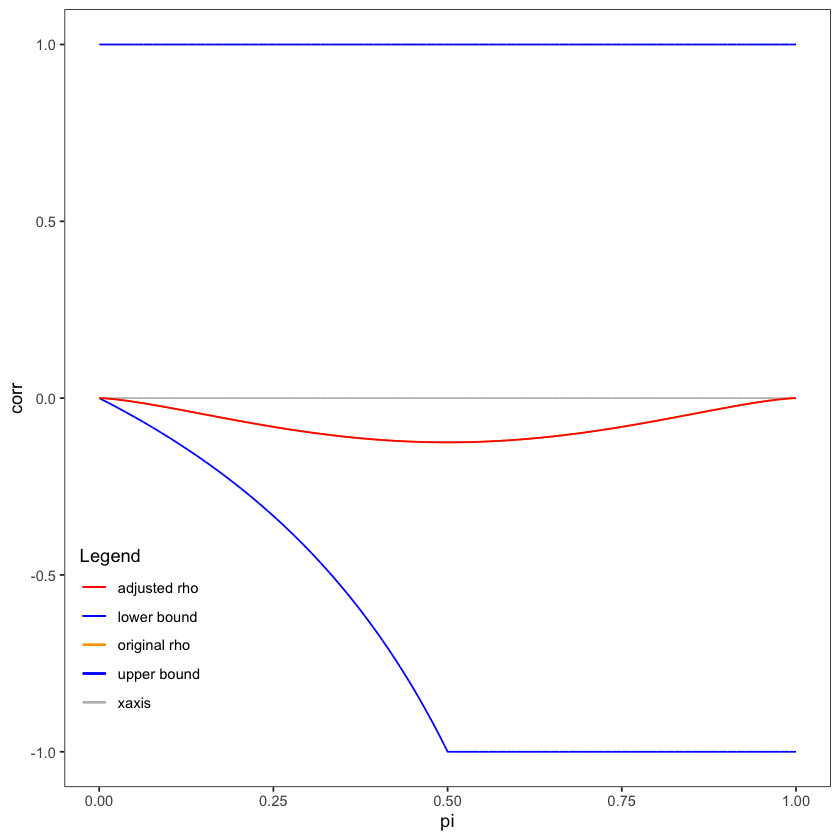

[1] 1.0 1.0 0.1
[1] 1.0 1.0 0.3
Time difference of 12.20861 secs


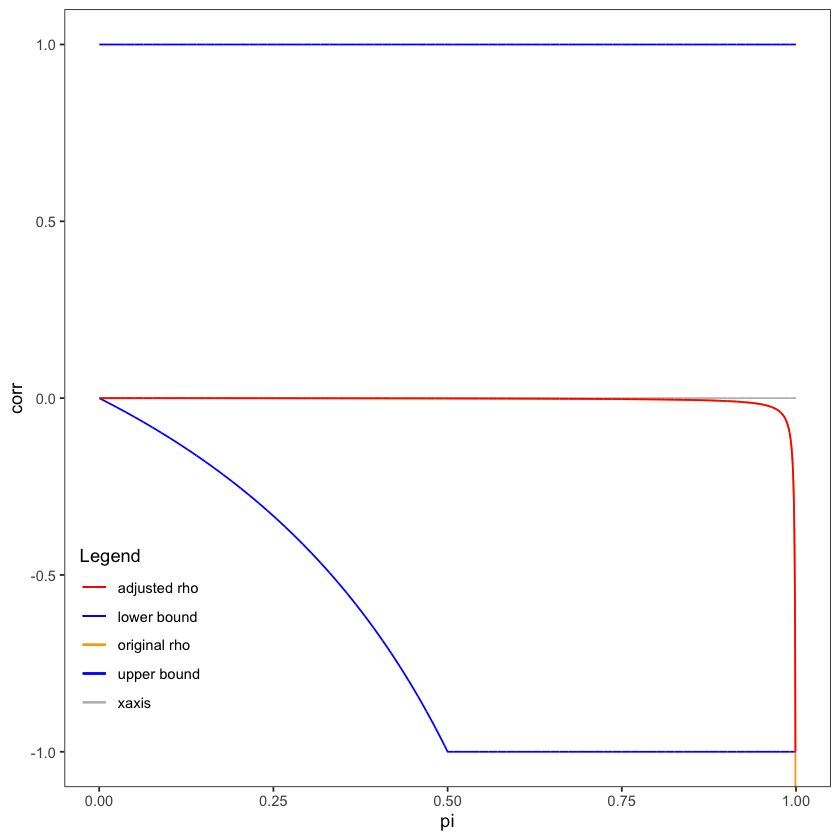

Warning message in file(file, "rt"):
“cannot open file 'C:\Users\Caleb Lee\Desktop\papers\PBb distribution\programs\power and type i analysis\power_three.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


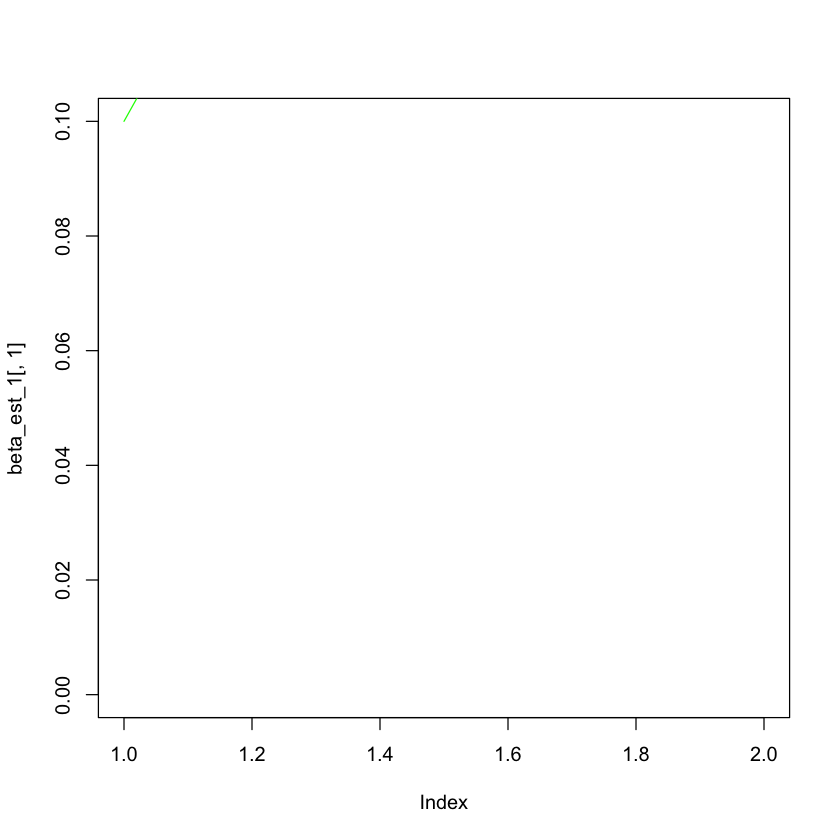

In [22]:
# accuracy of point estimation and inverval estimation

# library(ggplot2)
bth = c(1.5,1.5,-1)
data_gen = data_gen_fun(bth[1],bth[2],bth[3],ty=0)
plot_corr(data_gen,bth)

data_gen = data_gen_fun(eat11$alpha,eat11$beta,eat11$gamma,ty=0)
plot_corr(data_gen)


# par.real.matrix = matrix(c(1,1,0.4,1, 2,0.5,2, 1, 0.5),3,3,byrow = T)
par.real.matrix = matrix(c(0, 0, 0, ## T1, T2 type i error 
                           0, 0, 0.05, ## T2>T1 power and T3 type i error
                           0, 0, 0.1, ## T3 type i error
                           0.15,4.5,0.4,  ## T1>T2>>T3 power
                           1, 1, 0.3),5,3,byrow = T) ## T2>T1 power and T3 type i error

par.real.matrix = matrix(c(0.2,0.8,0.6),1,3,byrow = T) ## T3 type i error

library(parallel)
beta_est_1 = NULL
start_time = Sys.time()
n.times.run = 10  ## 1000
for(n.kinds in (c(1:2)*50)){  ## c(1:5)
  n = n.kinds
  pis.n = 10
  set.seed(100)
  pis = runif(pis.n,0,1)
  for(par.kinds in c(1:1)){
    par.real = par.real.matrix[par.kinds,]
      no_cores <- detectCores()
      cl<-makeCluster(no_cores)
      clusterEvalQ(cl, library(MASS))
      clusterEvalQ(cl, library(ggplot2))
      clusterEvalQ(cl, library(grid))
      clusterEvalQ(cl, library(lubridate))
      
      clusterExport(cl, "n");
      clusterExport(cl, "pis");
      clusterExport(cl, "par.real");
      # clusterExport(cl, "model");
      res0 <- parLapply(cl, 1:n.times.run, est_par_fun)
      stopCluster(cl)
      
      # beta_est_rough<- matrix(unlist(res0),n.times.run,3*(pis.n+8),byrow=T)
      # beta_est_refine = cbind(beta_est_rough,rep(n.kinds,n.times.run),rep(par.kinds,n.times.run))
      # if(is.null(beta_est_1)){
      #   beta_est_1 = beta_est_refine
      # }else{
      #   beta_est_1 = rbind(beta_est_1,beta_est_refine)
      # }
      
      beta_est_rough<- matrix(unlist(res0),n.times.run,3,byrow=T)
      # beta_est_rough<- matrix(unlist(res0),n.times.run,1,byrow=T)
      cp_value = colSums(beta_est_rough<0.05)/n.times.run
      print(cp_value)
      beta_est_refine = c(cp_value,n.kinds,par.kinds)
      beta_est_refine
      if(is.null(beta_est_1)){
        beta_est_1 = beta_est_refine
      }else{
        beta_est_1 = rbind(beta_est_1,beta_est_refine)
      }
  }
}

end_time = Sys.time()
print(end_time-start_time)
# beta_est_1
plot(beta_est_1[,1],type='l',ylim = c(0,0.1))
lines(beta_est_1[,2],type='l',col='red')
lines(beta_est_1[,3],type='l',col='green')

par_three = read.csv('C:\\Users\\Caleb Lee\\Desktop\\papers\\PBb distribution\\programs\\power and type i analysis\\power_three.csv',header = T)

par(mfrow=c(1,1))

power_est_1 = par_three[c(1:8),c(1:3)]
plot(c(1:8)*50,power_est_1[,1],type='b',xlab = "data size",ylim = c(0,0.1),col = 'red', ylab="empirical significant level")
points(c(1:8)*50,power_est_1[,2],type='b',pch=2, col="blue",lty=2)
legend('topleft',inset = .1,expression("T1","T2"),lty=c(1,2),pch=c(1,2),col = c("red","blue"))

power_est_1 = par_three[c(1:8)+8,c(1:3)]
plot(c(1:8)*50,power_est_1[,1],type='b',xlab = "data size",ylim = c(0,1),col = 'red', ylab="empirical power")
points(c(1:8)*50,power_est_1[,2],type='b',pch=2, col="blue",lty=2)
legend('topleft',inset = 0.1,expression("T1","T2"),lty=c(1,2),pch=c(1,2),col = c("red","blue"))

# power_est_1 = par_three[c(1:8)+16,c(1:3)]
# plot(power_est_1[,1],type='l',ylim = c(0,1))
# lines(power_est_1[,2],type='l',col="blue",lty=2)
# # lines(power_est_1[,3],type='l',col="red",lty=3)
# legend('topleft',inset = .03,expression("T1","T2","T3"),lty=c(1,2,3),col = c("black","blue","red"))

power_est_1 = par_three[c(1:8)+24,c(1:3)]
plot(c(1:8)*50,power_est_1[,1],type='b',xlab = "data size",ylim = c(0,1),col = 'red', ylab="empirical power")
points(c(1:8)*50,power_est_1[,2],type='b',pch=2, col="blue",lty=2)
legend('topleft',inset = .1,expression("T1","T2"),lty=c(1,2),pch=c(1,2),col = c("red","blue"))

# power_est_1 = par_three[c(1:8)+32,c(1:3)]
# plot(power_est_1[,1],type='b',xlab = "data size",ylim = c(0,1),col = 'red')
# points(power_est_1[,2],type='b',pch=2, col="blue",lty=2)
# legend('topleft',inset = .03,expression("T1","T2"),lty=c(1,2),pch=c(1,2),col = c("red","blue"))


power_est_1 = par_three[c(1:8)+16,c(1:3)]
plot(c(1:8)*50,power_est_1[,3],type='b',xlab = "data size",ylim = c(0,0.1),col = 'black', ylab="empirical significant level")
legend('topleft',inset = .03,expression("T3"),pch=1,col = 'black')

power_est_1 = par_three[c(1:8)+24,c(1:3)]
plot(c(1:8)*50,power_est_1[,3],type='b',xlab = "data size",ylim = c(0,1),col = 'black', ylab="empirical power")
legend('topleft',inset = .03,expression("T3"),pch=1,col = 'black')

power_est_1 = par_three[c(1:8)+40,c(1:3)]
plot(c(1:8)*50,power_est_1[,3],type='b',xlab = "data size",ylim = c(0,1),col = 'black', ylab="empirical power")
legend('topleft',inset = .03,expression("T3"),pch=1,col = 'black')





NULL

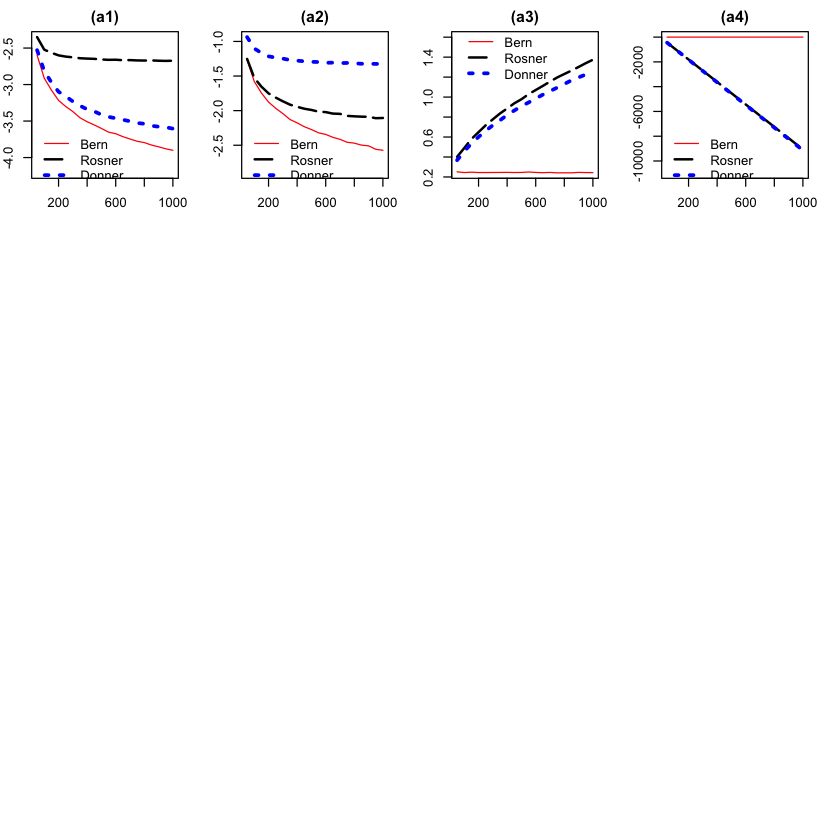

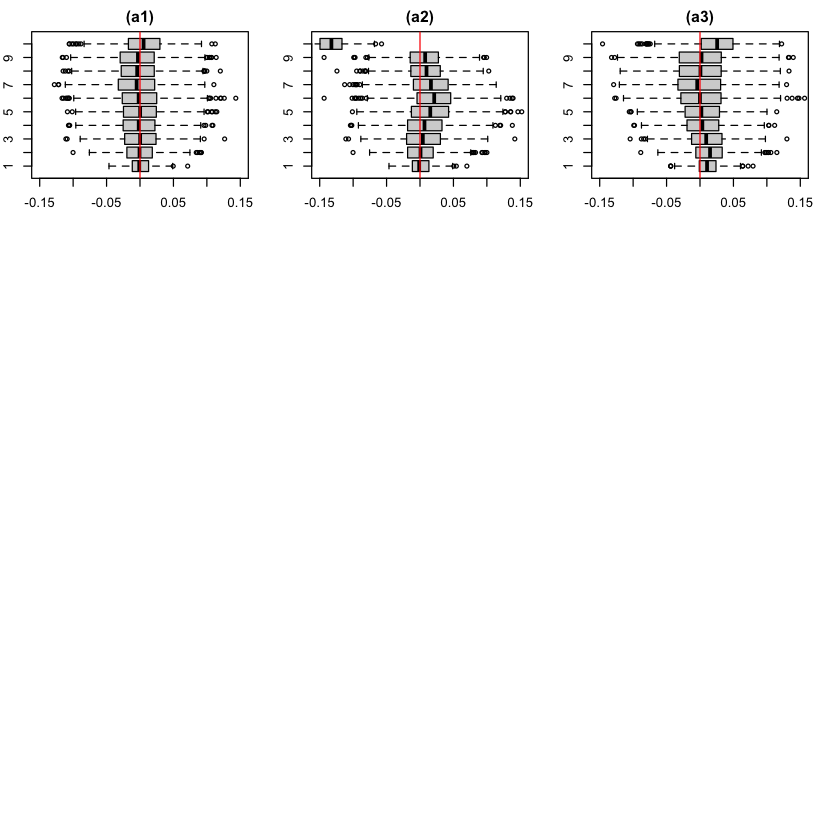

In [16]:
plot_comparison = function(data.mean,pis.n,kk22,sss1 = 1){
  
  kk2 = kk22
  kk = 1
  
  if(kk22 == 5|kk22 == 4){
    x.111 = log10(data.mean[,((pis.n+8)*(kk-1) + pis.n+kk2)])
    x.222 = log10(data.mean[,((pis.n+8)*(kk) + pis.n+kk2)])
    x.333 = log10(data.mean[,((pis.n+8)*(kk+1) + pis.n+kk2)])
  }else if(kk22 == 6){
    x.111 = data.mean[,((pis.n+8)*(kk-1) + pis.n+kk2)]
    x.222 = data.mean[,((pis.n+8)*(kk) + pis.n+kk2)]
    x.333 = data.mean[,((pis.n+8)*(kk+1) + pis.n+kk2)]
    
  }else if(kk22 == 7){
    x.111 = data.mean[,((pis.n+8)*(kk-1) + pis.n+kk2)]/sqrt(c(1:20)*50)
    x.222 = data.mean[,((pis.n+8)*(kk) + pis.n+kk2)]/sqrt(c(1:20)*50)
    x.333 = data.mean[,((pis.n+8)*(kk+1) + pis.n+kk2)]/sqrt(c(1:20)*50)
  }else{
    x.111 = data.mean[,((pis.n+8)*(kk-1) + pis.n+kk2)]
    x.222 = data.mean[,((pis.n+8)*(kk) + pis.n+kk2)]
    x.333 = data.mean[,((pis.n+8)*(kk+1) + pis.n+kk2)]
  }
  
  order11 = order(mean(x.111),mean(x.222),mean(x.333))
  
  if(kk2==6){
    x.111 = x.111 - rbind(x.111,x.222,x.333)[order11,]
    x.222 = x.222 - rbind(x.111,x.222,x.333)[order11,]
    x.333 = x.333 - rbind(x.111,x.222,x.333)[order11,]
  }
  names33 = c("(a1)","(a2)","(a3)","(a4)",
              "(b1)","(b2)","(b3)","(b4)",
              "(c1)","(c2)","(c3)","(c4)",
              "(d1)","(d2)","(d3)","(d4)")
  # names22 = c("gamma","alpha","beta", 
  #             expression(paste(  "log10 MSE",rho)),
  #             expression(paste(  "log10 MSE",pi)), 
  #             expression(paste( "loglikeli - loglikeli.Bern")), 
  #             expression(paste( "RMSE")))
  
  names22 = c("gamma","alpha","beta", names33[c(1:4)+(sss1-1)*4])
  
  max11 = max(c(x.111,x.222,x.333))
  min11 = min(c(x.111,x.222,x.333))
  
  test.sign11 = max(x.111)-min(x.111)
  test.sign22 = max(x.222)-min(x.222)
  test.sign33 = max(x.333)-min(x.333)
  test.num = which.max(c(test.sign11,test.sign22,test.sign33))
  x.numax = (rbind(x.111,x.222,x.333))[test.num,]
  
  if(kk2==5){kk21=4}
  if(kk2==4){kk21=5}
  if(kk2==7){kk21=6}
  if(kk2==6){kk21=7}
  
  if((x.numax[length(x.numax)]-x.numax[1])>0){
    
    plot((c(1:20)*50),x.111, ylim = c(min11,(max11+(max11-min11)*0.2)),ylab= names22[kk21],col='red',
         xlab = "sample size n", main = names22[kk21], lty=1, lwd=1,type='l')
    lines((c(1:20)*50),x.333,col='black', lty=5,lwd=2)
    lines((c(1:20)*50),x.222,col='blue', lty=3,lwd=3)
    
    legend(1*50, max11+0.3*(max11-min11), c("Bern", "Rosner", "Donner"), col = c("red", "black", "blue"),
           bty='n', lty = c(1, 5, 3), lwd=c(1, 2, 3))
  }else{
    
    plot((c(1:20)*50),x.111, ylim = c((min11-(max11-min11)*0.2),max11),ylab= names22[kk21], col='red',
         xlab = "sample size n", main = names22[kk21], lty=1, lwd=1,type='l')
    lines((c(1:20)*50),x.333,col='black', lty=5,lwd=2)
    lines((c(1:20)*50),x.222,col='blue', lty=3,lwd=3)
    
    legend(1*20, max11-0.8*(max11-min11), c("Bern", "Rosner", "Donner"), col = c("red", "black", "blue"),
           bty='n', lty = c(1, 5, 3), lwd=c(1, 2, 3))
  }
}

#### ?????еĦµȼ??ڴ˴??Ħ?-1
data2 = read.csv("/Users/caleblee/Desktop/skill summit time/2022年 已接收文章/TEST/PBb distribution/data/beta_est_1.csv",header = T)
# data3 = data2[,c(2:57)] # 0,1,0.5; 0.4,2,2; 1,0,0.2
# 
data4 = read.csv("/Users/caleblee/Desktop/skill summit time/2022年 已接收文章/TEST/PBb distribution/data/beta_est_2.csv",header = T)
# data3 = data4[,c(2:57)] # 1,1,1
# 
data5 = read.csv("/Users/caleblee/Desktop/skill summit time/2022年 已接收文章/TEST/PBb distribution/data/beta_est_3.csv",header = T)
# data3 = data5[,c(2:57)]; # 1,0,0.3

par.kinds = 2
data3 = data2[,c(2:57)] # 0,1,0.5; 0.4,2,2; 1,0,0.2
par.real.matrix = matrix(c(0,1,0.5,0.4,2,2,1,0,0.2),3,3,byrow = T)
par.real = par.real.matrix[par.kinds,]
pis.n = 10
set.seed(100)
pis = runif(pis.n,0,1)
# (pis,ga,al,be, MSE.c,MSE.pi, log_like_fun, MSE.data)

# data3 = data5[,c(2:57)]; # 1,0,0.3
# par.kinds = 3
# par.real.matrix = matrix(c(0,1,0.5,0.4,2,2,1,0,0.3),3,3,byrow = T)
# par.real = par.real.matrix[par.kinds,]
# set.seed(100)
# pis = runif(pis.n,0,0.6)

# data3 = data4[,c(2:57)] # 1,1,1
# par.kinds = 3
# par.real.matrix = matrix(c(0,1,0.5,0.4,2,2,1,1,1),3,3,byrow = T)
# par.real = par.real.matrix[par.kinds,]
# set.seed(100)
# pis = runif(pis.n,0,1)

mean.all = NULL
n.times.run = 1000
for(i in c(1:20)){
  beta_est_1.tra = subset(data3,data3[,56]==par.kinds & data3[,55]==i*50)
  rel.par = cbind(matrix(c(pis,par.real,0,0,0,0,0),n.times.run,(pis.n+8)*3,byrow = T),matrix(c(i*50,par.kinds),n.times.run,2,byrow = T))
  err.all = beta_est_1.tra - rel.par
  
  if(is.null(mean.all)){
    mean.all = colMeans(err.all)
  }else{
    mean.all = rbind(mean.all,colMeans(err.all))
  }
}


par(mfrow=c(4,4),mar=c(2,2,2,2))
sss1 = 1
for(i in c(5,4,7,6)){   ### change order from log10(MSE??), log10(MSE??), the difference between the log-likelihoods and RMSE 
                    ### to  log10(MSE??), log10(MSE??), RMSE and the difference between the log-likelihoods
  plot_comparison(mean.all,pis.n,i, sss1)
}
sss1 = sss1+1

## boxplots of estimation errors for the probabilities
i = 2
beta_est_1.tra = subset(data3,data3[,56]==par.kinds & data3[,55]==i*50)
# rel.par = cbind(matrix(c(pis,par.real,0,0,0,0,0),n.times.run,(pis.n+8)*3,byrow = T),matrix(c(i*50,par.kinds),n.times.run,2,byrow = T))
rel.par = cbind(matrix(c(pis,par.real,0,0,0,0,0),n.times.run,(pis.n+8)*3,byrow = T),matrix(0,n.times.run,2,byrow = T))
err.all = beta_est_1.tra - rel.par


err.all.mat.1 = NULL
for(kk in c(1:3)){
  err.all.mat.2 = err.all[,c(c((pis.n+8)*(kk-1) +1):((pis.n+8)*(kk-1) +pis.n),(pis.n+8)*kk)]
  err.all.mat.2 = as.matrix(err.all.mat.2)
  colnames(err.all.mat.2) = NULL
  rownames(err.all.mat.2) = NULL
  if(is.null(err.all.mat.1)){
    err.all.mat.1 = err.all.mat.2
  }else{
    err.all.mat.1 = rbind(err.all.mat.1,err.all.mat.2)
  }
  colnames(err.all.mat.1) = NULL
}
colnames(err.all.mat.1)


## boxplots of estimation errors for the probabilities

par(mfrow=c(4,3),mar=c(2,2,2,2))
ss1 = 1

for(kk in c(1,3,2)){  ## change order from Bern/Don/Ros to Bern/Ros/Don
  order11 = order(pis)
  err.mat = as.matrix(err.all[,c((pis.n+8)*(kk-1) +1):((pis.n+8)*(kk-1) +pis.n)])
  err.mat = err.mat[,order11]
  cor11.mat = apply(err.mat,2,var)
  colnames(err.mat)=NULL

  names123 = c("(a1)","(a2)","(a3)",
              "(b1)","(b2)","(b3)",
              "(c1)","(c2)","(c3)",
              "(d1)","(d2)","(d3)")

  if(kk==1){kk1 = 1}
  if(kk==2){kk1 = 3}
  if(kk==3){kk1 =2 }
  boxplot(err.mat,ylim=c(-0.15,0.15),xlab="",horizontal=TRUE,main=names123[kk1+(ss1-1)*3])

  axis(side=1, at=1:4, labels=FALSE)
  text(c(1:4), x=1:4, y=6, xpd=T, srt=30)
  lines(c(0,0),c(0,11),col='red')
}
ss1 = ss1+1



In [13]:
mean.all

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56
mean.all,-0.667351,-1.252063,-0.9114933,-1.431874,-0.5266501,-0.9905526,-0.6776784,-1.132750,-0.9261631,-0.8240385,⋯,-0.1187678,-0.4730418,-1.489819,-1.343759,-1.450772,-435.2671,5.239463,1.517435,48.4957,0.5186996
,-1.167870,-2.254188,-1.9157607,-2.432312,-1.0248334,-1.9907046,-1.6779138,-2.132108,-1.9271933,-1.3230112,⋯,-0.5889263,-1.4730418,-2.489819,-2.384932,-2.450936,-878.8990,10.830448,0.517435,97.4957,-0.4813004
,-1.665935,-3.255621,-2.9143110,-3.432023,-1.5242729,-2.9907653,-2.6777670,-3.133121,-2.9275657,-1.8242836,⋯,-1.0863720,-2.4730418,-3.489819,-3.395883,-3.451341,-1322.0373,16.394216,-0.482565,146.4957,-1.4813004
,-2.166662,-4.253829,-3.9157894,-4.433035,-2.0248018,-3.9896167,-3.6785243,-4.135488,-3.9264943,-2.3243039,⋯,-1.5824485,-3.4730418,-4.489819,-4.403524,-4.451400,-1764.0969,21.948589,-1.482565,195.4957,-2.4813004
,-2.668917,-5.254744,-4.9159039,-5.432920,-2.5248059,-4.9893336,-4.6768186,-5.135561,-4.9264618,-2.8238205,⋯,-2.0813134,-4.4730418,-5.489819,-5.408307,-5.451682,-2206.0113,27.548530,-2.482565,244.4957,-3.4813004
,-3.166086,-6.253657,-5.9144249,-6.431952,-3.0243488,-5.9889648,-5.6781589,-6.134306,-5.9258111,-3.3242125,⋯,-2.5835799,-5.4730418,-6.489819,-6.407420,-6.451641,-2651.5832,33.008927,-3.482565,293.4957,-4.4813004
,-3.666319,-7.254769,-6.9146431,-7.432857,-3.5230058,-6.9877396,-6.6783639,-7.135068,-6.9264414,-3.8243255,⋯,-3.0836715,-6.4730418,-7.489819,-7.410571,-7.451638,-3094.2263,38.641941,-4.482565,342.4957,-5.4813004
,-4.166728,-8.255490,-7.9138276,-8.432481,-4.0242057,-7.9895745,-7.6773890,-8.136852,-7.9264764,-4.3223359,⋯,-3.5790676,-7.4730418,-8.489819,-8.411196,-8.451660,-3537.1112,44.384022,-5.482565,391.4957,-6.4813004
,-4.666709,-9.253988,-8.9142180,-9.432217,-4.5235979,-8.9879948,-8.6770818,-9.133924,-8.9262041,-4.8239355,⋯,-4.0818825,-8.4730418,-9.489819,-9.411983,-9.451690,-3979.2709,49.856408,-6.482565,440.4957,-7.4813004
,-5.166611,-10.255613,-9.9135974,-10.432455,-5.0235730,-9.9889475,-9.6766128,-10.134609,-9.9259183,-5.3238308,⋯,-4.5827623,-9.4730418,-10.489819,-10.413958,-10.451811,-4423.2388,55.445950,-7.482565,489.4957,-8.4813004


[[1]]
[1] "MASS"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "MASS"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[3]]
[1] "MASS"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[4]]
[1] "MASS"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[5]]
[1] "MASS"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[6]]
[1] "MASS"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[7]]
[1] "MASS"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[8]]
[1] "MASS"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[9]]
[1] "MASS"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[10]]
[1] "MASS"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[11]]
[1] "MASS"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[12]]
[1] "MASS"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"

[[1]]
[1] "lubridate" "MASS"      "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[2]]
[1] "lubridate" "MASS"      "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
[1] "lubridate" "MASS"      "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[4]]
[1] "lubridate" "MASS"      "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[5]]
[1] "lubridate" "MASS"      "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[6]]
[1] "lubridate" "MASS"      "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[7]]
[1] "lubridate" "MASS"      "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[8]]
[1] "lubridate" "MASS"      "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[9]]
[1] "lubridate" "MASS"      "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[10]]
[1] "lubridate" "MASS"      "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[11]]
[1] "lubridate" "MASS"      "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[12]]
[1] "lubridate" "MASS"      "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"

-1719.418,-1719.418,-1719.418,63,537,4545
-2059.445,-1719.418,-1719.418,15,363,4522
-1871.456,-1719.418,-1723.044,46,430,4999
-2266.005,-1719.418,-1724.093,22,471,4999
-1768.239,-1719.418,-1719.418,32,465,4999
-1759.334,-1719.418,-1719.418,31,523,4552
-2133.488,-1719.418,-1720.577,25,457,4999
-1760.765,-1719.418,-1719.506,32,502,4999
-1719.418,-1719.418,-1719.418,70,515,4999
-1769.577,-1719.418,-1719.467,28,473,4999


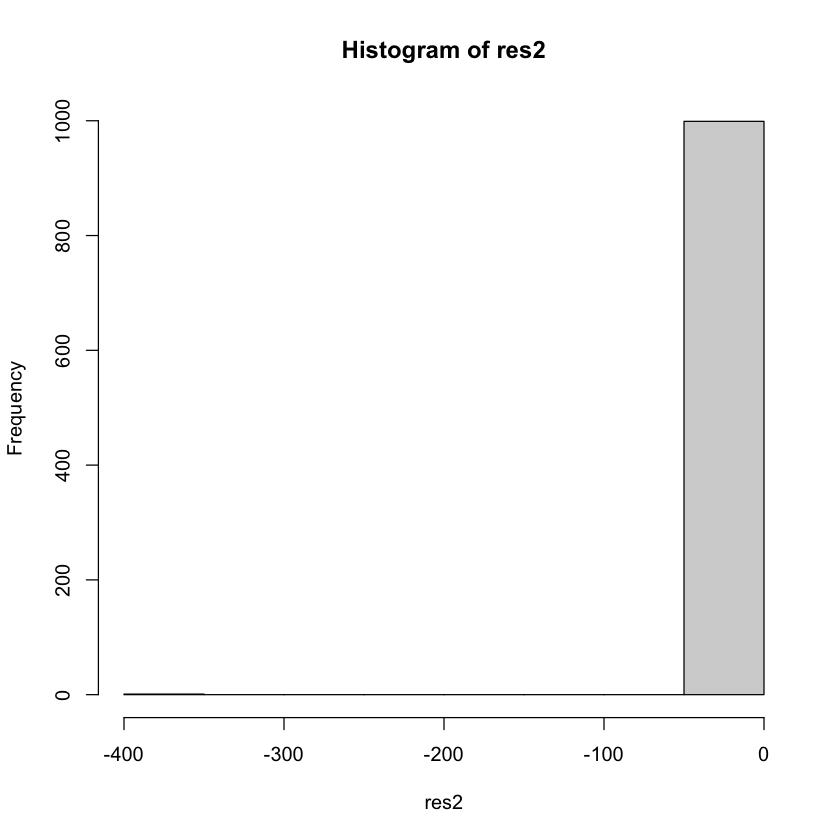

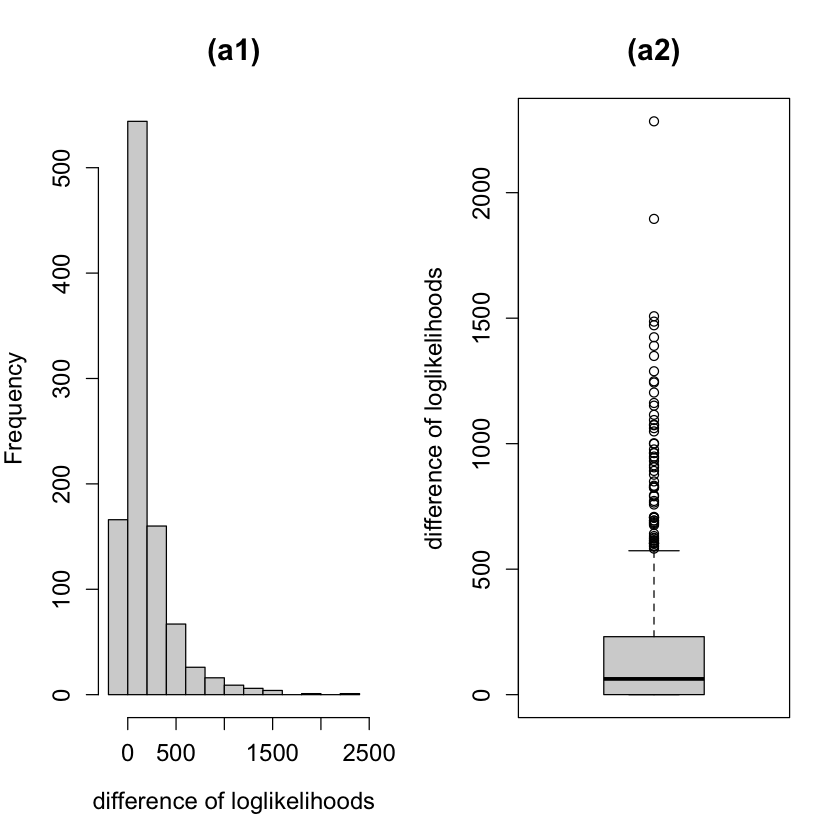

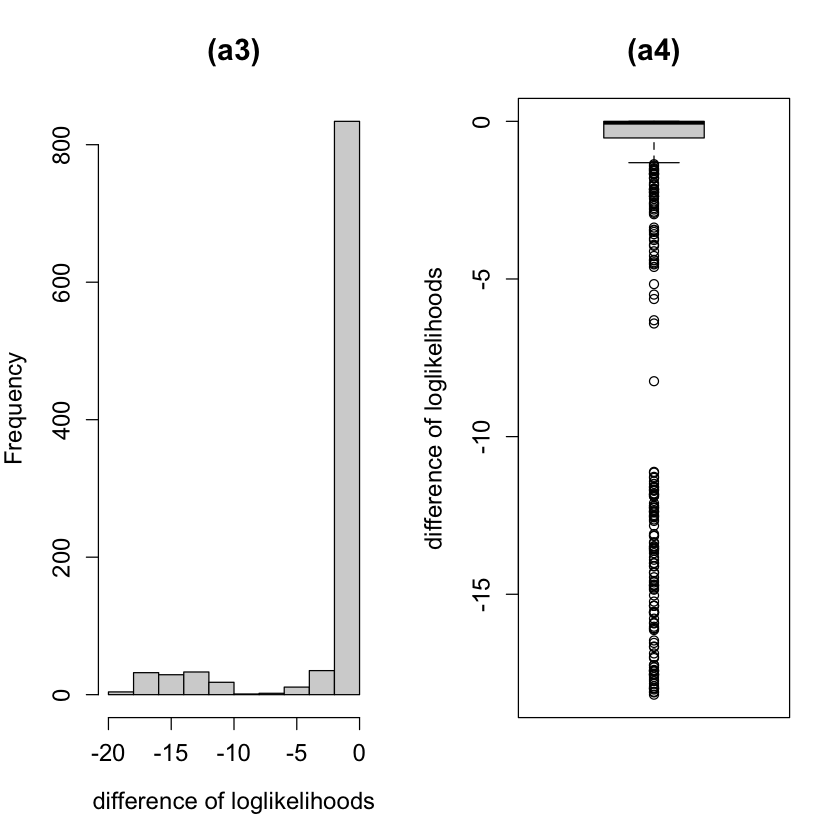

In [18]:
## comparison of NR and MM algorithm

### convergence of BFGS

correlations = function(x,a,b,c){
  K = c*x^(a-1)*(1-x)^(b)
  y1 = K*x
  y1_renew = fun_max(y1)
}

fun_max = function(y){
  n = length(y)
  for(i in c(1:n)){ y[i] = max(y[i],-1)}
  y
}

sample_PBb = function(m1,pis,al,be,ga){
  n.m = length(pis)
  coor1 = correlations(pis,al,be,ga)
  n.1 = c();
  n.2 = c();
  n.3 = c();
  for(i in c(1:n.m)){
    x.pro = rbinom(m1,1,pis[i])
    R.pi = ga*pis[i]^(al-1)*(1-pis[i])^(be+1) + 1
    if(0<=pis[i]*R.pi & pis[i]*R.pi <= 1){
      x.pro2 = rbinom(sum(x.pro),1,pis[i]*R.pi)
      x.pro1 = rbinom(sum(x.pro==0),1,(pis[i] - (pis[i])^2*R.pi)/(1-pis[i]))
      n.1[i] = sum(x.pro==0) - sum(x.pro1)
      n.2[i] = sum(x.pro1==1) + sum(x.pro2==0)
      n.3[i] = sum(x.pro2==1)
    }else if(pis[i]*R.pi>1){
      x.pro2 = sum(x.pro)
      x.pro1 = n - sum(x.pro)
      n.1[i] = x.pro1
      n.2[i] = 0
      n.3[i] = x.pro2
    }
  }
  rbind(n.1,n.2,n.3)
}




library(MASS)

func_convergence_BFGS = function(n){
  
  likelihood_fun.mm = function(x.pi,al,be,ga,a1,a2,a3){
    a1.min = min(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1))
    a2.min = min(2*(1-ga*x.pi^al*(1-x.pi)^(be)))
    a3.min = min(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1))
    if(min(a1.min,a2.min,a3.min)<0){
      y = NULL
    }else{
      y = sum((2*a1+a2)*log(1-x.pi)+(a2+2*a3)*log(x.pi)+a1*log(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1)) +
                a2*log(2*(1-ga*x.pi^al*(1-x.pi)^(be))) + a3*log(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1)))
    }
  }
  drba_fun_n = function(n1,n2,n3,r,a,b,x){
    dy1 = n1*(x^(a+1)*(1-x)^(b-1))/(1+r*x^(a+1)*(1-x)^(b-1))
    dy2 = n2*(-x^(a)*(1-x)^(b))/(1-r*x^a*(1-x)^(b))
    dy3 = n3*(x^(a-1)*(1-x)^(b+1))/(1+r*x^(a-1)*(1-x)^(b+1))
    dr =  sum(dy1 + dy2 + dy3)
    dbe =  sum(r*(dy1 + dy2 + dy3)*log(1-x)) + 0.00001/(b)
    dal =  sum(r*(dy1 + dy2 + dy3)*log(x)) + 0.00001/a
    c(dal,dbe,dr)
  }
  dpi_fun = function(n1,n2,n3,r,a,b,x){
    dy1 = n1*r*((a+1)*x^a*(1-x)^(b-1) - (b-1)*x^(a+1)*(1-x)^(b-2))/(1+r*x^(a+1)*(1-x)^(b-1))
    dy2 = n2*r*(-a*x^(a-1)*(1-x)^(b)+ (b)*x^a*(1-x)^(b-1))/(1-r*x^a*(1-x)^(b))
    dy3 = n3*r*((a-1)*x^(a-2)*(1-x)^(b+1)- (b+1)*x^(a-1)*(1-x)^(b))/(1+r*x^(a-1)*(1-x)^(b+1))
    dy = -(2*n1+n2)/(1-x) +(2*n3+n2)/x + dy1 + dy2 + dy3
  }
  
  correlations.real = function(x_new,n1,n2,n3){
    y.new = (n3/(n1+n2+n3)- x_new^2)/(x_new*(1-x_new))
  }
  correlations = function(x,a,b,c){
    K = c*x^(a-1)*(1-x)^(b)
    y1 = K*x
    y1_renew = fun_max(y1)
  }
  
  # fun_max = function(y){
  #   n = length(y)
  #   for(i in c(1:n)){ y[i] = max(y[i],-1);y[i] = min(y[i],1)}
  #   y
  # }
  fun_max = function(y){
    n = length(y)
    for(i in c(1:n)){ y[i] = max(y[i],-1)}
    y
  }
  data_gen_fun = function(a,b,c,ty){
    epslon = 0.0001
    x = seq(epslon,1-epslon,epslon)
    y = -x/(1-x)
    y_corr_lower = fun_max(y)  ## lower bound of correlation
    y_corr_upper = rep(1,length(x))
    y_zero = rep(0,length(x))
    if(ty == 1){
      K = a/x+(b+2)/(1-x)
      y1 = K*x
      y1_renew = fun_max(y1)
    }else{
      y1 = c*x^(a)*(1-x)^(b)
      y1_renew = fun_max(y1)
    }
    data_gen = data.frame(x,y_corr_lower,y_corr_upper,y_zero,y1,y1_renew)
  }
  plot_corr = function(data_gen,x.ori=NULL,x.corr=NULL){
    colors <- c("lower bound" = "blue", "upper bound" = "blue", "xaxis" = "grey","original rho" = "orange", "adjusted rho" = "red")
    
    p <- ggplot(data_gen, aes(x = x)) + geom_line(aes(y = y_corr_lower, color = "lower bound")) + 
      geom_line(aes(y = y_corr_upper, color = "upper bound")) +
      geom_line(aes(y = y_zero, color = "xaxis")) + 
      geom_line(aes(y = y1, color = "original rho")) + 
      geom_line(aes(y = y1_renew, color = "adjusted rho")) + 
      labs(x = "pi", y = "corr", color = "Legend") + 
      scale_color_manual(values = colors) + 
      coord_cartesian(xlim =c(0, 1), ylim = c(-1, 1))+ 
      theme_bw()+theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),legend.position = c(0.1, 0.2));
    
    if(!is.null(x.ori) && !is.null(x.corr)){
      df = data.frame(x.ori,x.corr) 
      p = p + geom_point(data = df, mapping = aes(x=x.ori, y= x.corr), shape = 8, colour="blue")
    }
    p
  }
  
  est_n = function(n,pis,al,be,ga){
    R.pi = ga*pis^(al-1)*(1-pis)^(be+1) + 1
    est.n3 = n*R.pi*pis^2
    est.n2 = n*2*(pis-R.pi*pis^2)
    est.n1 = n*(1-2*pis + R.pi*pis^2)
    rbind(est.n1,est.n2,est.n3)
  }
  
  ## algorithms
  est_pi_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    x.pi.new = x.pi
    while(esp>1e-12  && k<= k.max){
      r.1i = 1/(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1))
      r.3i = 1/(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1))
      s.m = 1-ga*(al/(al+be))^al*(be/(be+al))^be
      s.M = max(be^2,al^2)
      b1 = max((2*s.M/s.m-al)*(1-s.m)/s.m, 0)
      b2 = max((2*s.M/s.m-be)*(1-s.m)/s.m, 0)
      ## original wrong
      # b1 = (4*s.M-al+4*ga*s.M/s.m)*ga/s.m
      # b2 = (4*s.M-be+4*ga*s.M/s.m)*ga/s.m
      d.i1 = a1*(1-r.1i)*(al+1)+a2*(b1+1)+a3*((1-r.3i)*(al-1)+2)
      d.i2 = a3*(1-r.3i)*(be+1)+a2*(b2+1)+a1*((1-r.1i)*(be-1)+2)
      d.i3 = a2*(ga*(be*x.pi-al*(1-x.pi))*x.pi^(al-1)*(1-x.pi)^(be-1)/(1-ga*x.pi^al*(1-x.pi)^be)  -b1/x.pi+b2/(1-x.pi))
      Bt = d.i3-d.i1-d.i2
      d.i3.zero = c(1:length(d.i3))[d.i3==0]
      d.i3.nonzero = c(1:length(d.i3))[d.i3!=0]
      x.pi.new[d.i3.nonzero] = ((Bt + sqrt(Bt^2+4*d.i1*d.i3))/(2*d.i3))[d.i3.nonzero]
      x.pi.new[d.i3.zero] = (d.i1/(d.i1+d.i2))[d.i3.zero]
      esp = sum(abs(x.pi.new-x.pi))
      x.pi = x.pi.new
      k = k+1
    }
    x.pi
  }
  est_ga_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    T.m = max(x.pi^al*(1-x.pi)^be)
    r.2.tra = x.pi^al*(1-x.pi)^be
    while(esp>1e-12 && k<= k.max){
      r.1i = 1/(1+ga*x.pi^(al+1)*(1-x.pi)^(be-1))
      r.3i = 1/(1+ga*x.pi^(al-1)*(1-x.pi)^(be+1))
      d.i4 = a1*(1-r.1i) + a2*ga*(T.m-r.2.tra)/(1-ga*r.2.tra) + a3*(1-r.3i)
      d.i5 = a2*(1-ga*T.m)/(1-ga*r.2.tra)
      ga.new = min(sum(d.i4)/(sum(d.i4)+sum(d.i5))/T.m, (al/(al+be))^(-al)*(be/(be+al))^(-be))
      esp = sum(abs(ga-ga.new))
      ga = ga.new
      k = k+1
    }
    ga
  }
  f.alpha = function(al, be, ga){
    1 - ga*(al/(al+be))^al*(be/(al+be))^be
  }
  est_al_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    if(ga>1){
      al.min = 0.9*al
      while(f.alpha(al.min, be, ga)<0){
        al.min = 1.001*al.min
      }
      al.min = min(al.min,al)
    }else{
      al.min = 0
    }
    al.tilde = -log(x.pi)
    ga.1i = ga*x.pi*(1-x.pi)^(be-1)
    ga.2i = ga*(1-x.pi)^be
    ga.3i = ga*x.pi^(-1)*(1-x.pi)^(be+1)
    while(esp>1e-12 && k<= k.max){
      pi.tilde = exp(-al)
      pi.tilde.max = exp(-al.min)/2 + pi.tilde/2
      ###original wrong
      s.m1 = 1-pi.tilde.max^(al.tilde)*ga.2i
      # s.m1 = 1-pi.tilde.max^(al.tilde+1)*ga.2i
      b.3i = max(0,(al.tilde^2/s.m1-al.tilde)*(1-s.m1)/s.m1)
      d.i6 = a1*ga.1i*pi.tilde^(al.tilde)*al.tilde/(1+ga.1i*pi.tilde^(al.tilde)) + a2*b.3i + a3* ga.3i*pi.tilde^(al.tilde)*al.tilde/(1+ga.3i*pi.tilde^(al.tilde))
      d.i7 = a2*(ga.2i*al.tilde*pi.tilde^(al.tilde-1)/(1-ga.2i*pi.tilde^al.tilde) + b.3i/pi.tilde)
      pi.tilde.new = sum(d.i6)/sum(d.i7)
      al.new = max(-log(pi.tilde.new),-log(pi.tilde.max),1e-8)
      esp = sum(abs(al-al.new))
      al = al.new
      k = k+1
    }
    al
  }
  est_be_mm = function(x.pi,ga,al,be,a1,a2,a3,k.max=1000){
    k = 1
    esp = 1
    if(ga>1){
      be.min = 0.9*be
      while(f.alpha(al, be.min, ga)<0){
        be.min = 1.001*be.min
      }
      be.min = min(be.min,be)
    }else{
      be.min = 0
    }
    be.tilde = -log(1-x.pi)
    ga.4i = ga*x.pi^(al+1)*(1-x.pi)^(-1)
    ga.5i = ga*x.pi^al
    ga.6i = ga*x.pi^(al-1)*(1-x.pi)
    while(esp>1e-12 && k <= k.max){
      pi.tilde = exp(-be)
      pi.tilde.max = exp(-be.min)/2 + pi.tilde/2
      # pi.tilde.max = min(min((1/ga.5i)^(1/be.tilde)),1)/2 + pi.tilde/2 ## empirical
      ###original wrong
      s.m2 = 1-pi.tilde.max^(be.tilde)*ga.5i
      # s.m2 = 1-pi.tilde.max^(be.tilde+1)*ga.5i
      b.4i = max(0, (be.tilde^2/s.m2 - be.tilde)*(1-s.m2)/s.m2)
      d.i8 = a1*ga.4i*pi.tilde^(be.tilde)*be.tilde/(1+ga.4i*pi.tilde^(be.tilde)) + a2*b.4i + a3* ga.6i*pi.tilde^(be.tilde)*be.tilde/(1+ga.6i*pi.tilde^(be.tilde))
      d.i9 = a2*(ga.5i*be.tilde*pi.tilde^(be.tilde-1)/(1-ga.5i*pi.tilde^be.tilde) + b.4i/pi.tilde)
      pi.tilde.new = sum(d.i8)/sum(d.i9)
      be.new = max(-log(pi.tilde.new),-log(pi.tilde.max),1e-8)
      esp = sum(abs(be-be.new))
      be = be.new
      k = k+1
    }
    be
  }
  
  
  est_par_pbb_mm = function(n1,n2,n3,MM.method = 1,models = 1, para.ini){
    p = length(n1)
    start_time = Sys.time()
    # x.pi = runif(p); 
    # al = 1; be = 1; ga = 0.1; 
    x.pi = para.ini[c(1:p)]
    # al = runif(1);  be = runif(1);  ga = runif(1)
    al = para.ini[p+1];  be = para.ini[p+2];  ga = para.ini[p+3]
    step.len = 0.01; 
    esp = 1; i = 1; li.all = c(); esp.all = 1
    gradient.method = 1 - MM.method
    li.all[i] = likelihood_fun.mm(x.pi,al,be,ga,n1,n2,n3)
    
    if(MM.method==1){ error.min = 1e-10 }else{ error.min = 1e-10}
    
    while(esp.all>error.min & i<5e3){
      # pi_new = est_pi_mm(x.pi,ga,al,be,n1,n2,n3)
      # x.pi = pi_new
      if(gradient.method == 1){
        dpi_val = dpi_fun(n1,n2,n3,ga,al,be,x.pi)
        drba_val = drba_fun_n(n1,n2,n3,ga,al,be,x.pi)
        does1 = 1
        while(does1){
          pi_new = x.pi  + step.len*dpi_val
          if(models == 1){
            al_new = al + step.len*drba_val[1]
            if(al_new <= 0){ al_new = 0.0000001}
            be_new = be + step.len*drba_val[2]
            if(be_new <= 0){ be_new = 0.0000001}
            p.dimen = p+3
          }
          if(models == 2){ al_new = 0; be_new = 0; p.dimen = p+1}
          if(models == 3){ al_new = 1; be_new = -1; p.dimen = p+1}
          ga_new = ga + step.len*drba_val[3]
          if(ga_new <= 0){ ga_new = 0.0000001}
          if(models == 4){ al_new = 0; be_new = 0; ga_new=0; p.dimen = p}
          facts.check = sum(pi_new>1) + sum(pi_new<0)
          if(facts.check==0){
            li.all.NEW = likelihood_fun.mm(pi_new,al_new,be_new,ga_new,n1,n2,n3)
            if(!is.null(li.all.NEW)){
              facks1 = li.all.NEW >= li.all[i]
              if(facks1){
                x.pi = pi_new;
                be = be_new
                al = al_new
                ga = ga_new
                i = i+1
                li.all[i] = li.all.NEW
                does1 = 0
              }
            }
          }
          if(does1){step.len = 0.8*step.len}
        }
      }
      if(MM.method == 1){
        if(models == 2){al_new = 0; al = al_new; be_new = 0;  be = be_new; p.dimen = p+1}
        if(models == 3){print("Not support with MM algorithm"); break}
        
        if(models == 4){
          ga_new = 0; ga = ga_new; al_new = 0; al = al_new; be_new = 0;  be = be_new
          pi_new = est_pi_mm(x.pi,ga,al,be,n1,n2,n3)
          x.pi = pi_new
          p.dimen = p
        }else{
          pi_new = est_pi_mm(x.pi,ga,al,be,n1,n2,n3)
          x.pi = pi_new
          ga_new = est_ga_mm(x.pi,ga,al,be,n1,n2,n3)
          ga = ga_new
        }
        if(models == 1){
          al_new = est_al_mm(x.pi,ga,al,be,n1,n2,n3)
          al = al_new
          be_new = est_be_mm(x.pi,ga,al,be,n1,n2,n3)
          be = be_new
          p.dimen = p+3
        }
        
        li.all.NEW = likelihood_fun.mm(x.pi,al_new,be_new,ga,n1,n2,n3)
        i = i+1
        does1 = 0
        li.all[i] = li.all.NEW
      }
      if(i>1 & (1-does1)){
        esp.all = abs(li.all[i]-li.all[i-1])/(abs(li.all[i])+1)
      }
    }
    end_time = Sys.time()
    
    print(end_time-start_time)
    
    # plot(li.all,type = 'l')
    
    x.corr = correlations.real(x.pi,n1,n2,n3)
    n.all = n1+n2+n3
    x.corr.sim = correlations(x.pi,al,be,ga)
    MSE.c = mean((x.corr.sim-x.corr)^2)
    est_n_real = est_n(n.all,x.pi,al,be,ga)
    n_real = rbind(n1,n2,n3)
    MSE.data = sqrt(mean(colSums((est_n_real-n_real)^2)/colSums(n_real)))
    
    
    list.all = list()
    list.all$pi = pi_new
    list.all$alpha = al
    list.all$beta = be
    list.all$gamma = ga
    list.all$loglikelihood=li.all.NEW
    list.all$AIC = 2*p.dimen-2*li.all.NEW
    list.all$BIC = log(sum(n1+n2+n3))*p.dimen-2*li.all.NEW
    list.all$corr.fit = x.corr.sim
    list.all$MSE.c = MSE.c
    list.all$MSE.data = MSE.data
    # list.all$loglikelihood.all = li.all
    list.all$iter = i-1
    list.all$time = as.duration(end_time-start_time)
    
    return(list.all)
  } #models = 1 PBb; 2 Donner; 3 Rosner; 4 independent
  
  
  
  est_par_pbb_BFGS = function(n1,n2,n3, para.ini){
    error.min = 1e-10
    p = length(n1)
    esp = 1; i = 1; li.all = c(); esp.all = 1
    # para.ini = c(runif(p),1,1,0.1)
    para = para.ini
    
    li.all.old = likelihood_fun.mm(para[c(1:p)],para[p+1],para[p+2],para[p+3],n1,n2,n3)
    I0 = diag(1,p+3)
    Gt = -I0
    ## calculating gradient
    gradient_func = function(para){
      dpi_val = dpi_fun(n1,n2,n3,para[p+3],para[p+1],para[p+2],para[c(1:p)])
      drba_val = drba_fun_n(n1,n2,n3,para[p+3],para[p+1],para[p+2],para[c(1:p)])
      gradient = c(dpi_val,drba_val)
      gradient = as.matrix(gradient)
    }
    if(i==1){
      ## calculating gradient
      gradient = gradient_func(para)
      ## setting step size
      step.len = 0.01/max(abs(gradient))
      does1 = 1
      while(does1){
        ## first updating
        para.new = para - step.len*(-I0)%*%gradient
        li.all.new = likelihood_fun.mm(para.new[c(1:p)],para.new[p+1],para.new[p+2],para.new[p+3],n1,n2,n3)
        if(is.null(li.all.new) ||  li.all.new<li.all.old){
          step.len = 0.8*step.len
        }else{
          does1 = 0
        }
      }
      li.all.old = li.all.new
      li.all[i] = li.all.old
    }
    
    while(esp.all>error.min  && i<1e4){
      ## calculating gradient
      gradient.new = gradient_func(para.new)
      ## calculating Gt
      yt = as.matrix(gradient.new - gradient)
      st = matrix(c(para.new - para),p+3,1,byrow=F)
      Gt = (I0-st%*%t(yt)/as.numeric(t(st)%*%yt))%*%Gt%*%(I0-yt%*%t(st)/as.numeric(t(st)%*%yt)) + st%*%t(st)/as.numeric(t(st)%*%yt)
      para = para.new
      step.len = 1
      para.new.tra = para.new - step.len*Gt%*%gradient
      while(sum(sign(para.new.tra))!=(p+3) || -sum(sign(para.new.tra[1:p]-1))!=p){
        step.len = 0.5*step.len
        para.new.tra = para.new - step.len*Gt%*%gradient
      }
      li.all.new = likelihood_fun.mm(para.new.tra[c(1:p)],para.new.tra[p+1],para.new.tra[p+2],para.new.tra[p+3],n1,n2,n3)
      
      while(is.null(li.all.new)  || li.all.new< li.all.old){
        step.len = 0.5*step.len
        para.new.tra = para.new - step.len*Gt%*%gradient
        li.all.new = likelihood_fun.mm(para.new.tra[c(1:p)],para.new.tra[p+1],para.new.tra[p+2],para.new.tra[p+3],n1,n2,n3)
      }
      para.new = para.new.tra
      
      if(i>1){ esp.all = abs(li.all.new-li.all.old)/(abs(li.all.new)+1) }
      li.all.old = li.all.new
      gradient = gradient.new
      i = i+1
      li.all[i] = li.all.new
    }
    
    p.dimen = p+3
    
    list.all = list()
    list.all$pi = para.new[c(1:p)]
    list.all$alpha = para.new[p+1]
    list.all$beta = para.new[p+2]
    list.all$gamma = para.new[p+3]
    
    list.all$loglikelihood=li.all.new
    list.all$AIC = 2*p.dimen-2*li.all.new
    list.all$BIC = log(sum(n1+n2+n3))*p.dimen-2*li.all.new
    list.all$iter = i-1
    
    return(list.all)
    
  }
  
  p = length(n1)
  para.ini = runif(p+3)
  eat11.BFGS = est_par_pbb_BFGS(n1,n2,n3, para.ini)
  eat11.mm = est_par_pbb_mm(n1,n2,n3,1,1, para.ini)
  eat11.gra = est_par_pbb_mm(n1,n2,n3,0,1, para.ini)
  return(c(eat11.BFGS$loglikelihood, eat11.mm$loglikelihood, eat11.gra$loglikelihood,
           eat11.BFGS$iter,          eat11.mm$iter,          eat11.gra$iter))
  
}

n = 200
pis.n = 10
set.seed(200)
pis = runif(pis.n,0,1)
al0 = 0.4
be0 = 1
ga0 = 2

sample.rep = 1
while(sample.rep == 1){
  data.sample = sample_PBb(n, pis, al0, be0, ga0)  #4,6,1
  sample.rep = sum(colSums(data.sample[c(2,3),])==0)
}

n1 = data.sample[1,]
n2 = data.sample[2,]
n3 = data.sample[3,]

library(parallel)
start_time = Sys.time()
n.times.run = 10
no_cores <- detectCores()
cl<-makeCluster(no_cores)
clusterEvalQ(cl, library(MASS))
clusterEvalQ(cl, library(lubridate))
clusterExport(cl, "n1");
clusterExport(cl, "n2");
clusterExport(cl, "n3");
res0 <- parLapply(cl, 1:n.times.run, func_convergence_BFGS)
stopCluster(cl)

beta_est_rough<- matrix(unlist(res0),n.times.run,6,byrow=T)
# write.csv(beta_est_rough,'C:\\Users\\Caleb Lee\\Desktop\\convergence of BFGS.csv')
beta_est_rough


beta_est_rough = read.csv("/Users/caleblee/Desktop/skill summit time/2022年 已接收文章/TEST/PBb distribution/programs/convergence of BFGS.csv")
beta_est_rough = beta_est_rough[,-1]

res1 = (beta_est_rough[,2] - beta_est_rough[,1])


# list1 = c(1:1000)[res1+0.1<0]
# res11 = res1[list1]
# hist(res11)
# boxplot(res11)

res2 = (beta_est_rough[,3] - beta_est_rough[,2])
hist(res2)

list2 = c(1:1000)[res2+100>0]
res22 = res2[list2]


par(mfrow=c(1,2))
hist(res1,main = '(a1)',xlab = 'difference of loglikelihoods',cex.lab=1.2,cex.axis=1.2,cex.main=1.5)
boxplot(res1,main = '(a2)',ylab = 'difference of loglikelihoods',cex.lab=1.2,cex.axis=1.2,cex.main=1.5)
hist(res22,main = '(a3)',xlab = 'difference of loglikelihoods',cex.lab=1.2,cex.axis=1.2,cex.main=1.5)
boxplot(res22,main = '(a4)',ylab = 'difference of loglikelihoods',cex.lab=1.2,cex.axis=1.2,cex.main=1.5)